In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)
library(ggplot2)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [2]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_labelled_neuron')
obj

Loading required package: SeuratObject

Attaching sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
59227 features across 107464 samples within 3 assays 
Active assay: SCT (26906 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [3]:
obj@meta.data = obj@meta.data %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))
obj@meta.data$group = interaction(obj@meta.data$treatment, obj@meta.data$time, obj@meta.data$strain, drop = TRUE)

In [4]:
head(obj@meta.data)

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO
GCAGCCACACAGCCAC_1_1 SI-TT-A11  69641      7356         SI-TT-A11 1532      
TGCTTGCAGTTCCGTA_1_1 SI-TT-A11  71825      7455         SI-TT-A11 1616      
TGCGGCACAGCATGCC_1_1 SI-TT-A11  65517      7244         SI-TT-A11 2197      
GAGGCAAGTACCTAAC_1_1 SI-TT-A11  68817      7344         SI-TT-A11 1884      
TAGCACATCACTGTTT_1_1 SI-TT-A11  70863      7560         SI-TT-A11 1771      
GTAATGCTCTGTCCCA_1_1 SI-TT-A11  69910      7425         SI-TT-A11 2555      
                     nFeature_HTO Index.HTO nCount_spliced nFeature_spliced
GCAGCCACACAGCCAC_1_1 12           D706       9837          3757            
TGCTTGCAGTTCCGTA_1_1 12           D706       8834          3443            
TGCGGCACAGCATGCC_1_1 12           D706       8779          3410            
GAGGCAAGTACCTAAC_1_1 12           D706       8246          3326            
TAGCACATCACTGTTT_1_1 12           D706       9612          3747            
GTAATGCTCTGTCCCA_1_1 12           D706      10497          3727            
                     nCount_unspliced ⋯ strain treatment time  collection_date
GCAGCCACACAGCCAC_1_1 59804            ⋯ obob   FGF1      Day5  220329         
TGCTTGCAGTTCCGTA_1_1 62991            ⋯ obob   Veh_PF    Day14 220201         
TGCGGCACAGCATGCC_1_1 56738            ⋯ BL6    Veh_PF    Day5  220329         
GAGGCAAGTACCTAAC_1_1 60571            ⋯ obob   Veh_PF    Day14 220201         
TAGCACATCACTGTTT_1_1 61251            ⋯ BL6    Veh_PF    Day5  220329         
GTAATGCTCTGTCCCA_1_1 59413            ⋯ obob   FGF1      Day5  211213         
                     isolation_date batch    predicted.id prediction.score.max
GCAGCCACACAGCCAC_1_1 22/6/2022      Batch__1 Nr5a1_Bdnf   1.0000000           
TGCTTGCAGTTCCGTA_1_1 22/6/2022      Batch__1 Unassigned1  0.8065577           
TGCGGCACAGCATGCC_1_1 22/6/2022      Batch__1 Nr5a1_Bdnf   1.0000000           
GAGGCAAGTACCTAAC_1_1 22/6/2022      Batch__1 Unassigned1  0.8525726           
TAGCACATCACTGTTT_1_1 22/6/2022      Batch__1 Sst_Pthlh    0.6754849           
GTAATGCTCTGTCCCA_1_1 22/6/2022      Batch__1 Hdc          1.0000000           
                     labels          group            
GCAGCCACACAGCCAC_1_1 Nr5a1_Bdnf      FGF1.Day5.obob   
TGCTTGCAGTTCCGTA_1_1 Unassigned1     Veh_PF.Day14.obob
TGCGGCACAGCATGCC_1_1 Nr5a1_Bdnf      Veh_PF.Day5.BL6  
GAGGCAAGTACCTAAC_1_1 Unassigned1     Veh_PF.Day14.obob
TAGCACATCACTGTTT_1_1 Sst_Pthlh-Ghrh  Veh_PF.Day5.BL6  
GTAATGCTCTGTCCCA_1_1 Gm8773_Tac1-Hdc FGF1.Day5.obob

In [5]:
sce = as.SingleCellExperiment(obj)
sce

class: SingleCellExperiment 
dim: 26906 107464 
metadata(0):
assays(2): counts logcounts
rownames(26906): ENSMUSG00000089699 ENSMUSG00000104238 ...
  ENSMUSG00000095263 LOC665290
rowData names(0):
colnames(107464): GCAGCCACACAGCCAC_1_1 TGCTTGCAGTTCCGTA_1_1 ...
  TGGAGGAAGCGGTAGT_5_3 TGATTCTGTGCCGTTG_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [6]:
# reducedDim(sce, "PCA", withDimnames=TRUE) <- obj[['pca']]@cell.embeddings

In [7]:
# sce <- runUMAP(sce, dimred='PCA', name = 'UMAP', n_dimred = 30)

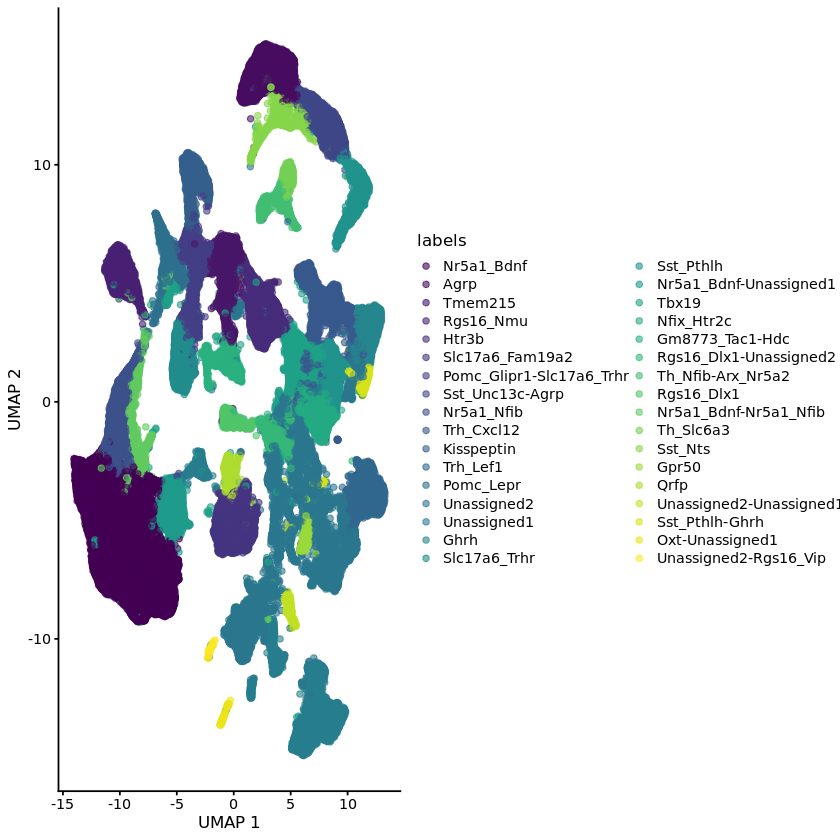

In [8]:
plotReducedDim(sce, colour_by = 'labels', dimred='UMAP', )

In [9]:
obob_milo <- Milo(sce)

#build KNN graph
obob_milo <- buildGraph(obob_milo, k=40, d=30, reduced.dim = 'PCA')

#define neighbourhoods
obob_milo <- makeNhoods(obob_milo, prop = 0.1, k= 40, d=30, refined = T, reduced_dims = 'PCA')

Constructing kNN graph with k:40

Checking valid object

Running refined sampling with reduced_dim



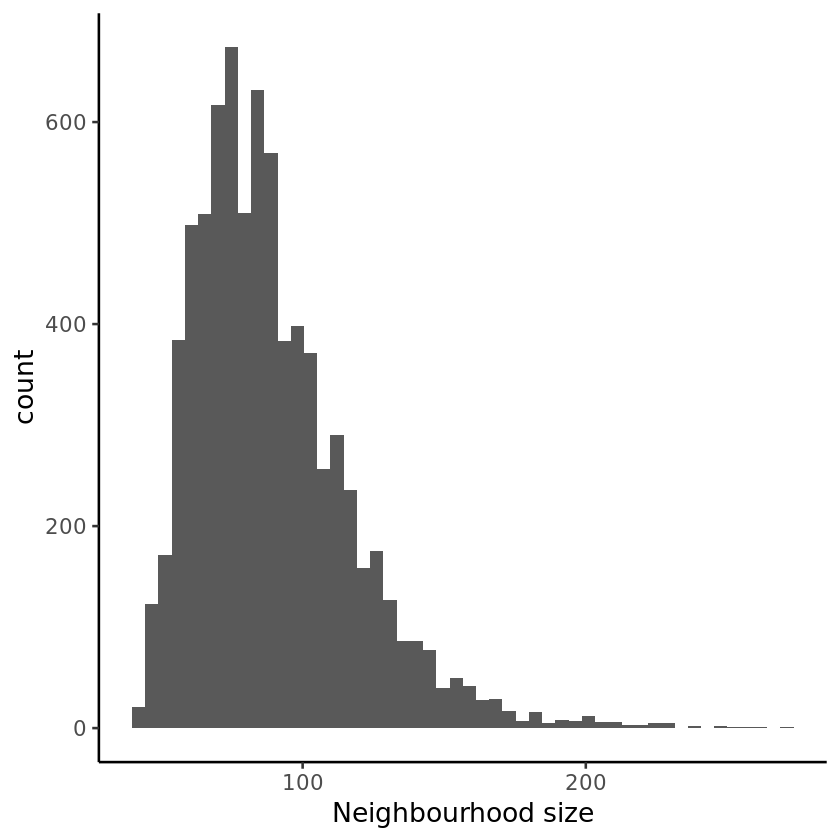

In [10]:
#plot neighbourhood sizes to check if we used appropriate k for graph building
  #we want to have an average size over 5 x N_samples
  #we have 171 samples - but not all samples will be in all neighbourhoods because of age variance
plotNhoodSizeHist(obob_milo)

Checking meta.data validity

Counting cells in neighbourhoods



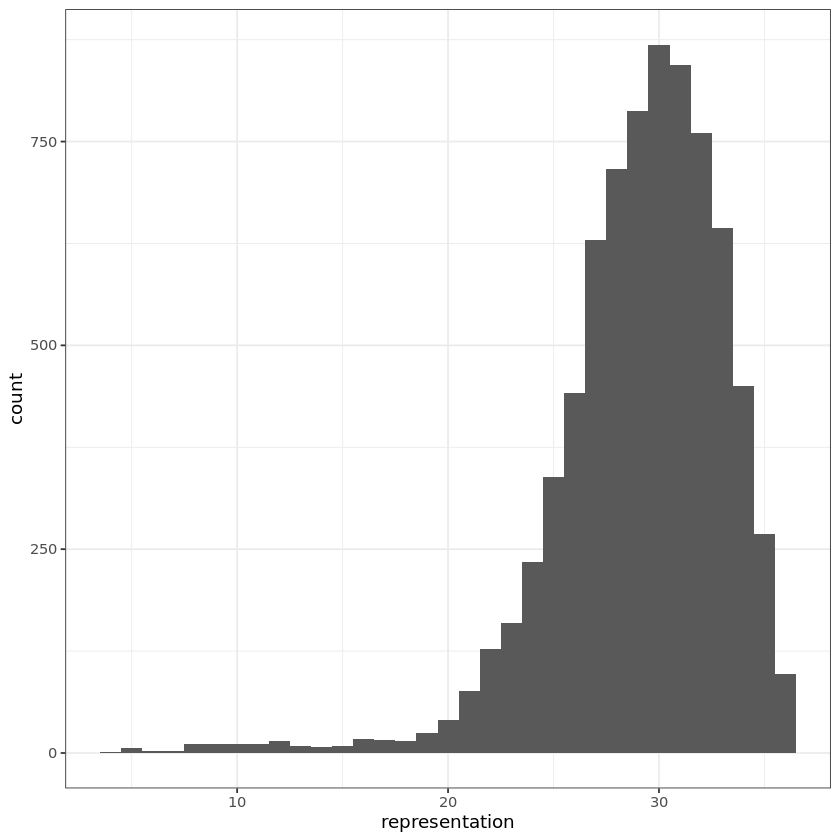

In [11]:
#add a n x m matrix to the milo object with number of neighbourhodds and samples
obob_milo <- countCells(obob_milo, meta.data = as.data.frame(colData(obob_milo)), sample = 'hash.mcl.ID')

#calculate sample representation in each neighbourhood
cell_counts <- as.data.frame(nhoodCounts(obob_milo)) %>% mutate(representation = rowSums(.>0))

#view distribution of N_samples in each neigbourhood
ggplot(cell_counts, aes(x = representation)) + 
  geom_histogram(binwidth = 1) + theme_bw()

#most neighbourhoods have 30-60 samples in them

In [12]:
obob_design <- data.frame(colData(obob_milo))[, c('hash.mcl.ID', 'group', 'batch', "strain")]
#convert seq-pool to factor
obob_design$batch <- as.factor(obob_design$batch)
#keep unique rows
obob_design <- distinct(obob_design)
#change rownames
rownames(obob_design) <- obob_design$hash.mcl.ID
head(obob_design)

hash.mcl.ID group             batch    strain
M9 M9          FGF1.Day5.obob    Batch__1 obob  
J2 J2          Veh_PF.Day14.obob Batch__1 obob  
M2 M2          Veh_PF.Day5.BL6   Batch__1 BL6   
N7 N7          FGF1.Day5.obob    Batch__1 obob  
M8 M8          Veh_PF.Day5.obob  Batch__1 obob  
N8 N8          Veh_PF.Day5.obob  Batch__1 obob

In [13]:
print(obob_design)

    hash.mcl.ID             group    batch strain
M9           M9    FGF1.Day5.obob Batch__1   obob
J2           J2 Veh_PF.Day14.obob Batch__1   obob
M2           M2   Veh_PF.Day5.BL6 Batch__1    BL6
N7           N7    FGF1.Day5.obob Batch__1   obob
M8           M8  Veh_PF.Day5.obob Batch__1   obob
N8           N8  Veh_PF.Day5.obob Batch__1   obob
M13         M13   FGF1.Day14.obob Batch__1   obob
M18         M18  Veh_PF.Day14.BL6 Batch__1    BL6
M17         M17  Veh_PF.Day14.BL6 Batch__1    BL6
M24         M24 Veh_PF.Day14.obob Batch__1   obob
J11         J11   FGF1.Day14.obob Batch__1   obob
M4           M4   Veh_PF.Day5.BL6 Batch__1    BL6
J16         J16   FGF1.Day14.obob Batch__2   obob
M11         M11  Veh_PF.Day5.obob Batch__2   obob
M5           M5   Veh_PF.Day5.BL6 Batch__2    BL6
M23         M23   FGF1.Day14.obob Batch__2   obob
N17         N17    FGF1.Day5.obob Batch__2   obob
M19         M19  Veh_PF.Day14.BL6 Batch__2    BL6
M25         M25 Veh_PF.Day14.obob Batch__2   obob


In [14]:
length(unique(obob_design$group))

[1] 6

In [15]:
dput(unique(obob_design$group))

structure(c(5L, 4L, 2L, 6L, 3L, 1L), .Label = c("Veh_PF.Day14.BL6", 
"Veh_PF.Day5.BL6", "FGF1.Day14.obob", "Veh_PF.Day14.obob", "FGF1.Day5.obob", 
"Veh_PF.Day5.obob"), class = "factor")


In [ ]:
# store distances to nearest neighbours
# obob_milo <- calcNhoodDistance(obob_milo, d=30, reduced.dim = 'PCA')
# qs::qsave(obob_milo, 'obob_milo_neuron_all.qs')
obob_milo = qs::qread('obob_milo_neuron_all.qs')

In [133]:
# contrast.all = c("groupFGF1.Day5-groupVeh_PF.Day5")
model <- model.matrix(~0 + group + batch, data=obob_design)
# mod.contrast <- makeContrasts(contrasts=contrast.all, levels=model)
head(model)

groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob
M9 0                     0                    0                    0                      1                  
J2 0                     0                    0                    1                      0                  
M2 0                     1                    0                    0                      0                  
N7 0                     0                    0                    0                      1                  
M8 0                     0                    0                    0                      0                  
N8 0                     0                    0                    0                      0                  
   groupVeh_PF.Day5.obob batchBatch__2 batchBatch__3
M9 0                     0             0            
J2 0                     0             0            
M2 0                     0             0            
N7 0                     0             0            
M8 1                     0             0            
N8 1                     0             0

In [134]:
options(width=120) 
print(model)

    groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob
M9                      0                    0                    0                      0                   1
J2                      0                    0                    0                      1                   0
M2                      0                    1                    0                      0                   0
N7                      0                    0                    0                      0                   1
M8                      0                    0                    0                      0                   0
N8                      0                    0                    0                      0                   0
M13                     0                    0                    1                      0                   0
M18                     1                    0                    0                      0                   0
M

In [135]:
print(mod.contrast)

ERROR: Error in print(mod.contrast): object 'mod.contrast' not found


In [627]:
# da_results <- testNhoods(obob_milo, design = model, design.df = obob_design) #works!
da_results <- testNhoods(obob_milo, design = model, design.df = obob_design, 
                         model.contrasts = c("((groupVeh_PF.Day5.obob+groupVeh_PF.Day14.obob)/2) - ((groupVeh_PF.Day5.BL6+groupVeh_PF.Day14.BL6)/2)"))

da_results %>%
  arrange(SpatialFDR) %>%
  head()

table(da_results$FDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



logFC     logCPM   F        PValue       FDR          Nhood SpatialFDR  
5075 -6.306492 8.465567 150.3337 2.032966e-24 1.555015e-20 5075  1.180110e-20
565  -7.163425 8.280162 147.0793 2.966262e-23 6.456135e-20  565  5.094431e-20
770  -5.695366 8.434936 139.3945 3.376198e-23 6.456135e-20  770  5.094431e-20
1190 -6.159559 8.265808 139.7691 3.061071e-23 6.456135e-20 1190  5.094431e-20
7034 -7.013459 8.137977 130.4241 1.797423e-21 2.749697e-18 7034  2.211439e-18
4984 -6.949520 8.085268 125.7007 6.039606e-21 7.699491e-18 4984  6.201683e-18


FALSE  TRUE 
 6736   913 

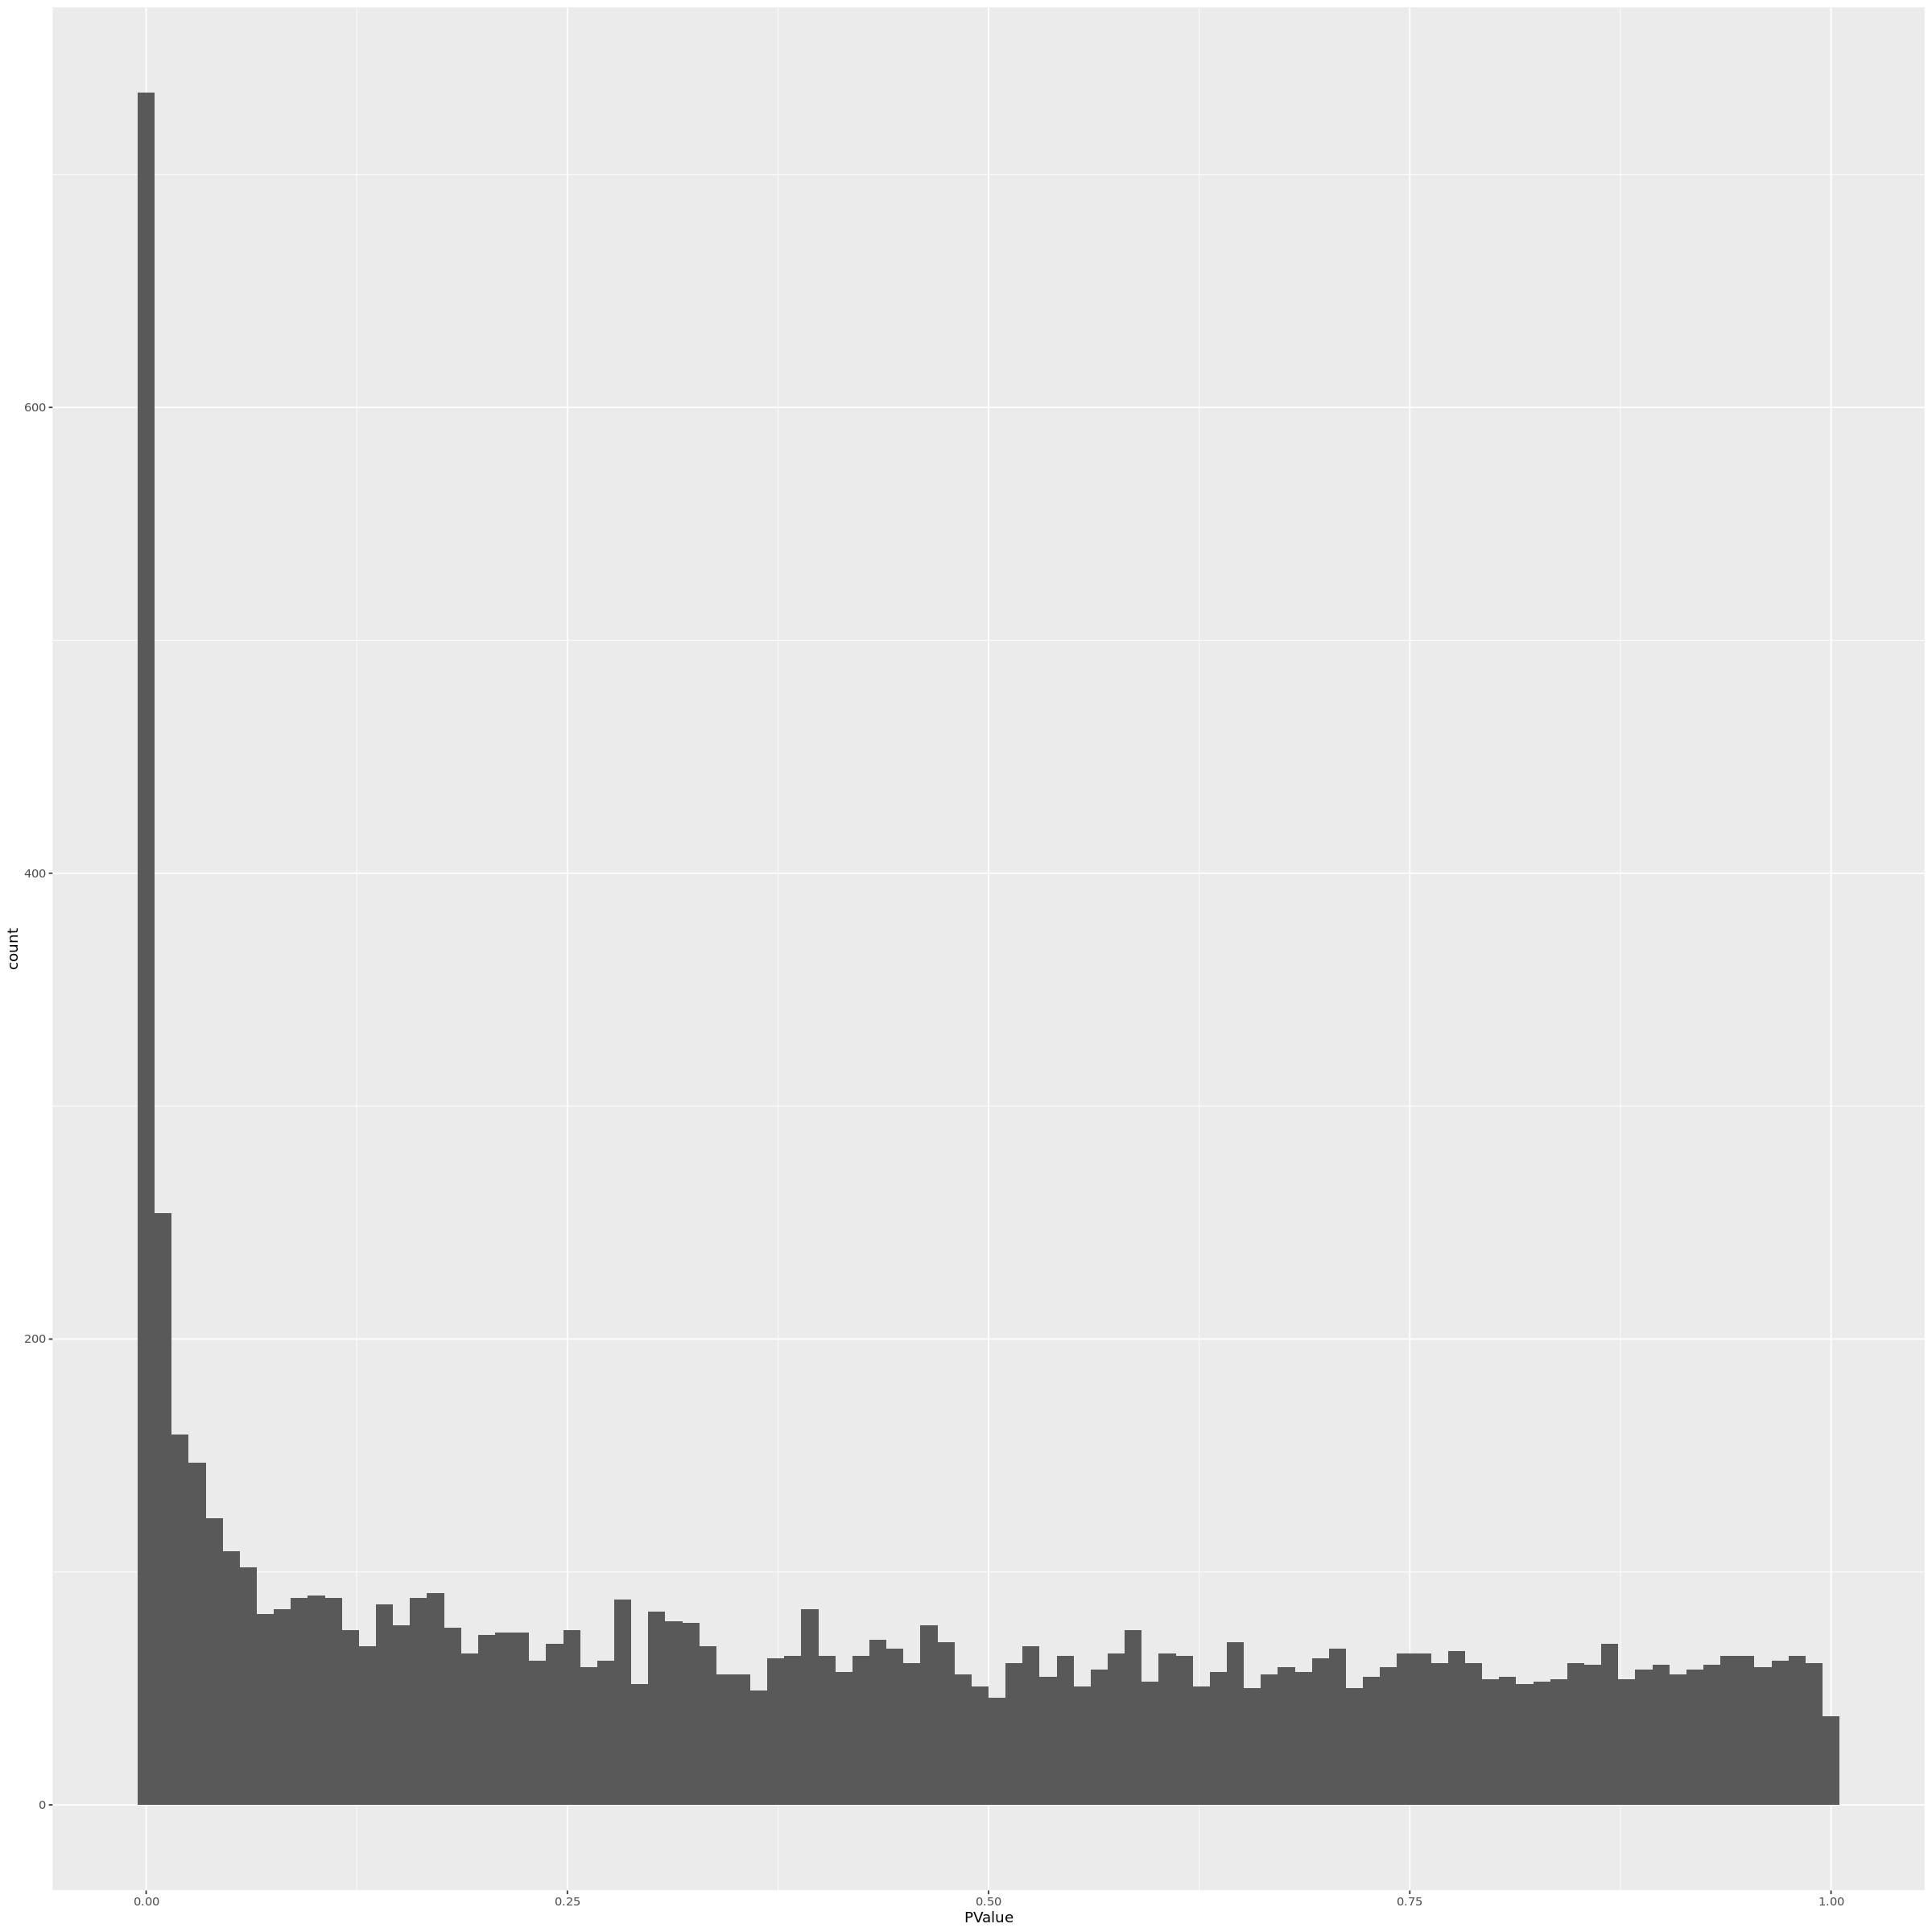

In [628]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=100)

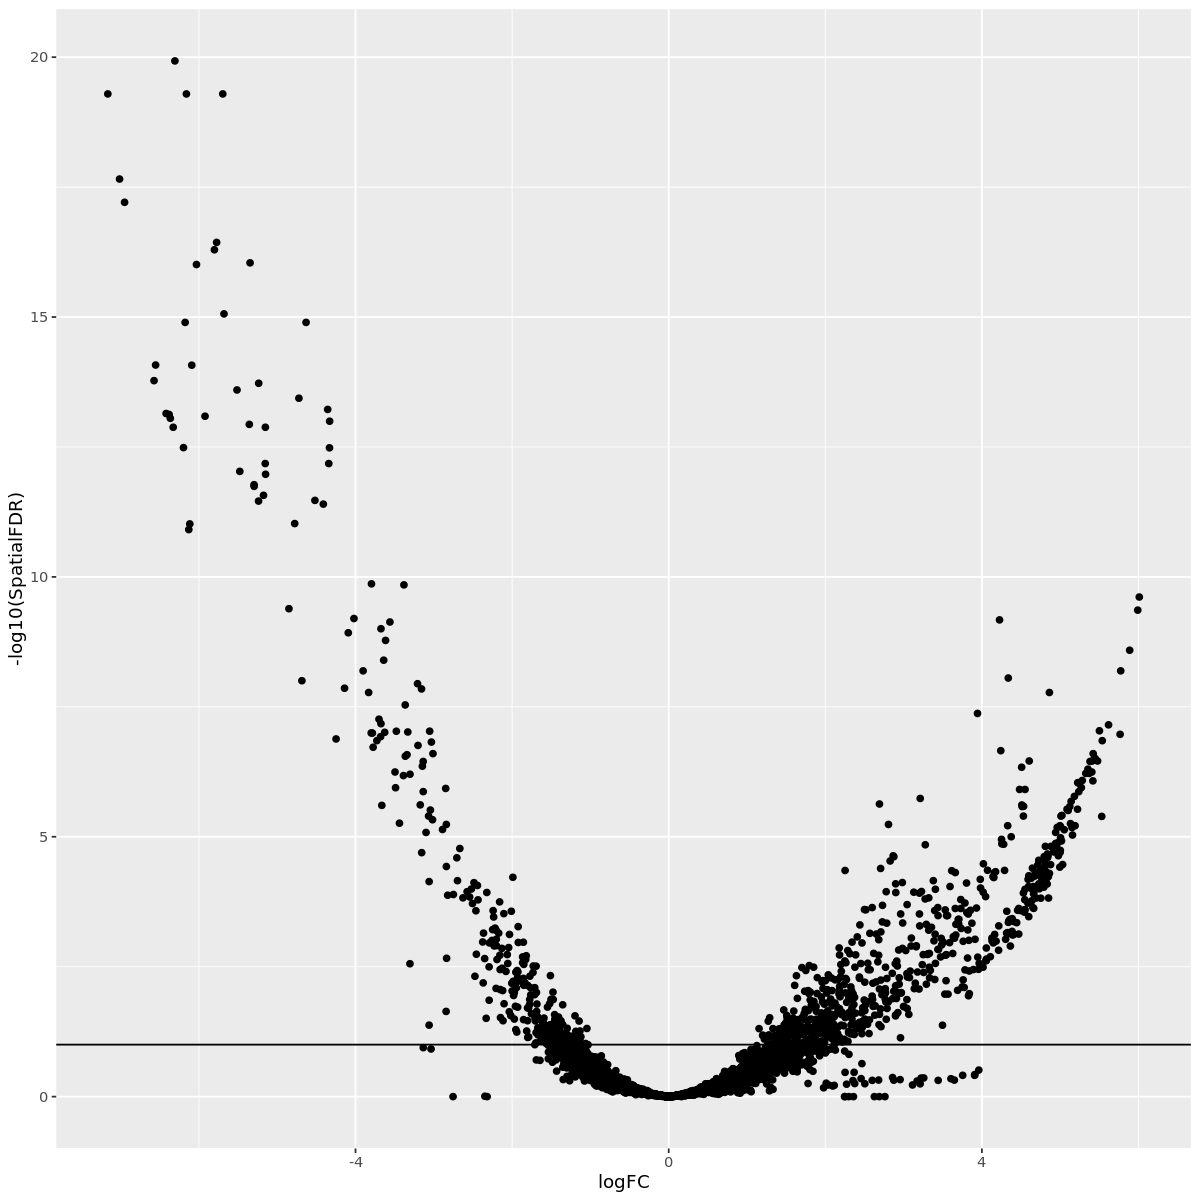

In [629]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

In [630]:
obob_milo <- buildNhoodGraph(obob_milo)

In [631]:
head(data.frame(colData(obob_milo)))

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO nFeature_HTO Index.HTO nCount_spliced
GCAGCCACACAGCCAC_1_1 SI-TT-A11  69641      7356         SI-TT-A11 1532       12           D706       9837         
TGCTTGCAGTTCCGTA_1_1 SI-TT-A11  71825      7455         SI-TT-A11 1616       12           D706       8834         
TGCGGCACAGCATGCC_1_1 SI-TT-A11  65517      7244         SI-TT-A11 2197       12           D706       8779         
GAGGCAAGTACCTAAC_1_1 SI-TT-A11  68817      7344         SI-TT-A11 1884       12           D706       8246         
TAGCACATCACTGTTT_1_1 SI-TT-A11  70863      7560         SI-TT-A11 1771       12           D706       9612         
GTAATGCTCTGTCCCA_1_1 SI-TT-A11  69910      7425         SI-TT-A11 2555       12           D706      10497         
                     nFeature_spliced nCount_unspliced ⋯ treatment time  collection_date isolation_date batch   
GCAGCCACACAGCCAC_1_1 3757             59804            ⋯ FGF1      Day5  220329          22/6/2022      Batch__1
TGCTTGCAGTTCCGTA_1_1 3443             62991            ⋯ Veh_PF    Day14 220201          22/6/2022      Batch__1
TGCGGCACAGCATGCC_1_1 3410             56738            ⋯ Veh_PF    Day5  220329          22/6/2022      Batch__1
GAGGCAAGTACCTAAC_1_1 3326             60571            ⋯ Veh_PF    Day14 220201          22/6/2022      Batch__1
TAGCACATCACTGTTT_1_1 3747             61251            ⋯ Veh_PF    Day5  220329          22/6/2022      Batch__1
GTAATGCTCTGTCCCA_1_1 3727             59413            ⋯ FGF1      Day5  211213          22/6/2022      Batch__1
                     predicted.id prediction.score.max labels          group             ident
GCAGCCACACAGCCAC_1_1 Nr5a1_Bdnf   1.0000000            Nr5a1_Bdnf      FGF1.Day5.obob    0    
TGCTTGCAGTTCCGTA_1_1 Unassigned1  0.8065577            Unassigned1     Veh_PF.Day14.obob 17   
TGCGGCACAGCATGCC_1_1 Nr5a1_Bdnf   1.0000000            Nr5a1_Bdnf      Veh_PF.Day5.BL6   0    
GAGGCAAGTACCTAAC_1_1 Unassigned1  0.8525726            Unassigned1     Veh_PF.Day14.obob 28   
TAGCACATCACTGTTT_1_1 Sst_Pthlh    0.6754849            Sst_Pthlh-Ghrh  Veh_PF.Day5.BL6   47   
GTAATGCTCTGTCCCA_1_1 Hdc          1.0000000            Gm8773_Tac1-Hdc FGF1.Day5.obob    27

In [632]:
options(repr.plot.width=10, repr.plot.height=10)
umap_pl <- plotReducedDim(obob_milo, dimred = "UMAP", colour_by="labels", text_by = "labels", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none") 

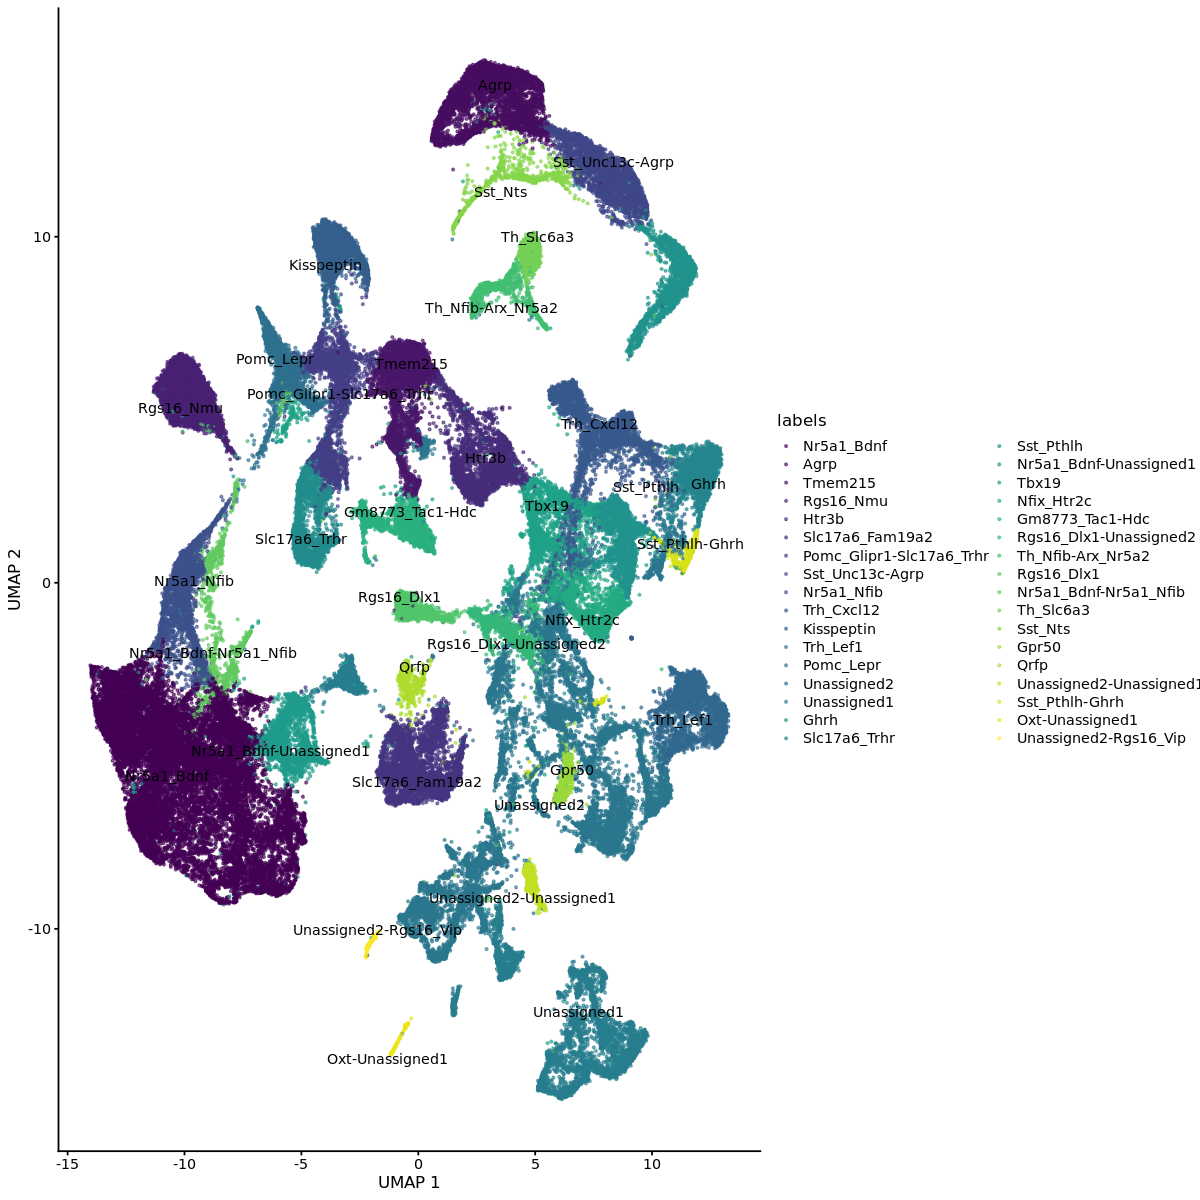

In [633]:
umap_pl

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



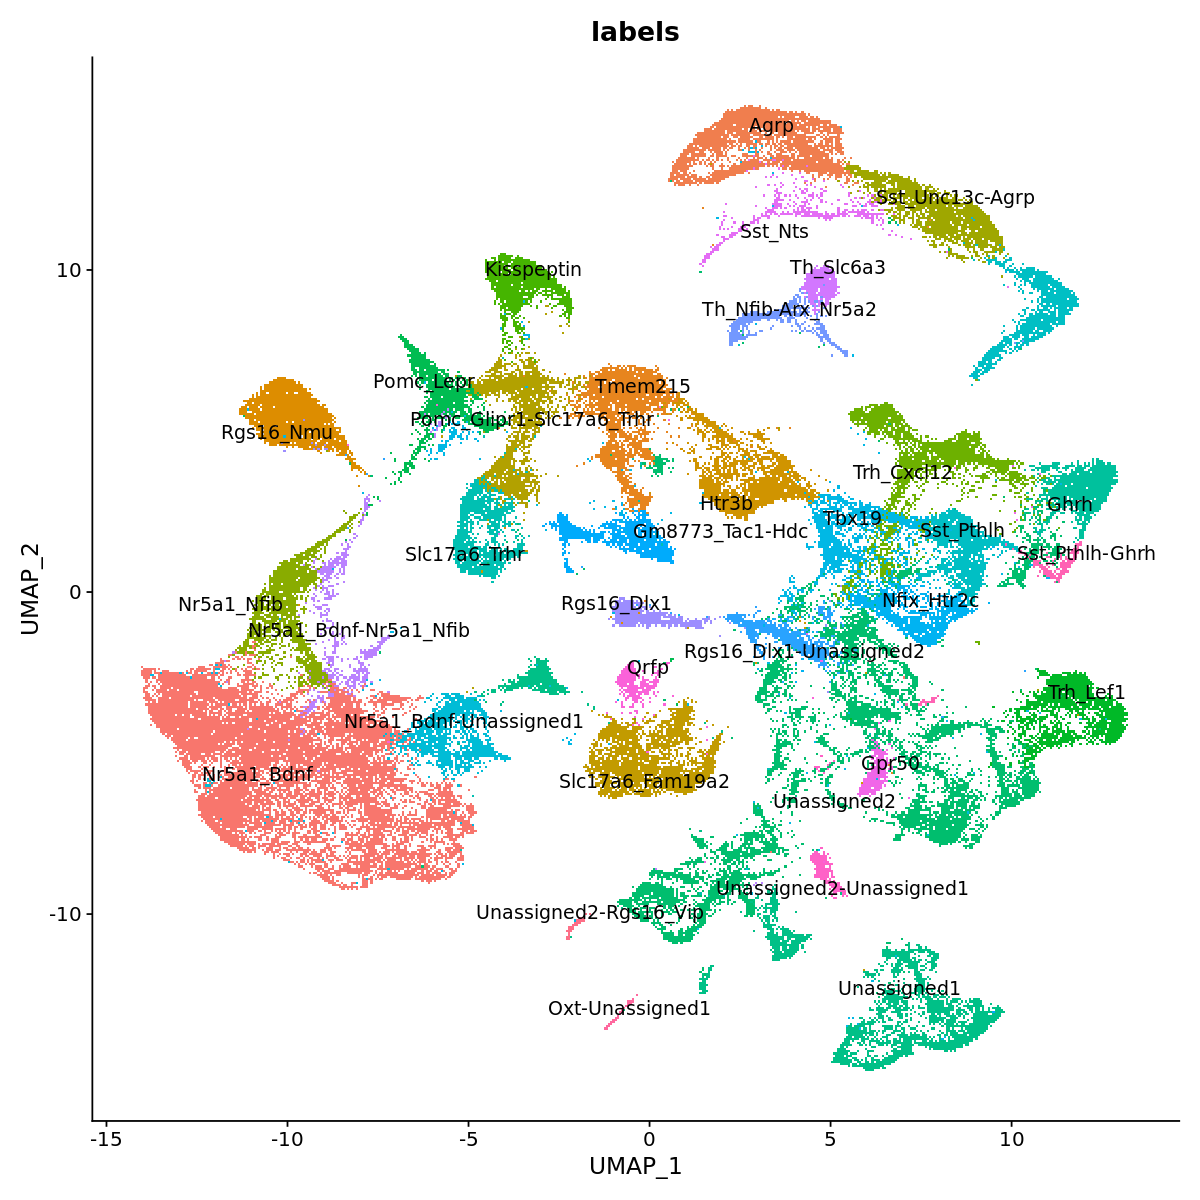

In [634]:
options(repr.plot.width=10, repr.plot.height=10)
umap_plot = DimPlot(obj, reduction = "umap", group.by = "labels", label = TRUE,  repel = TRUE) + NoLegend()
umap_plot

In [635]:
nh_graph_pl <- plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

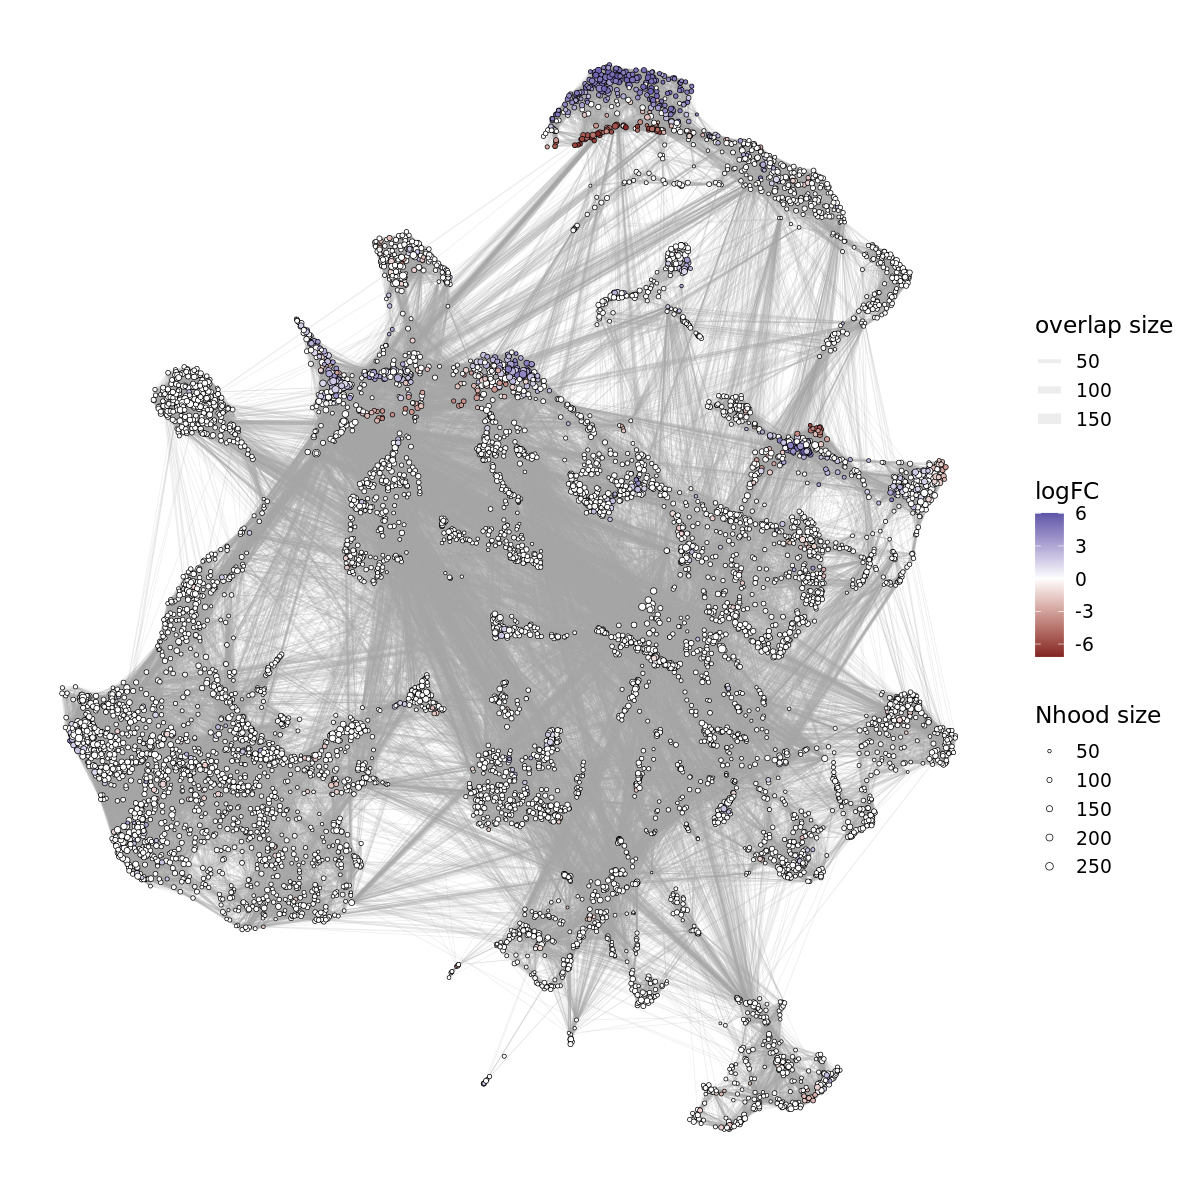

In [636]:
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2), ) 

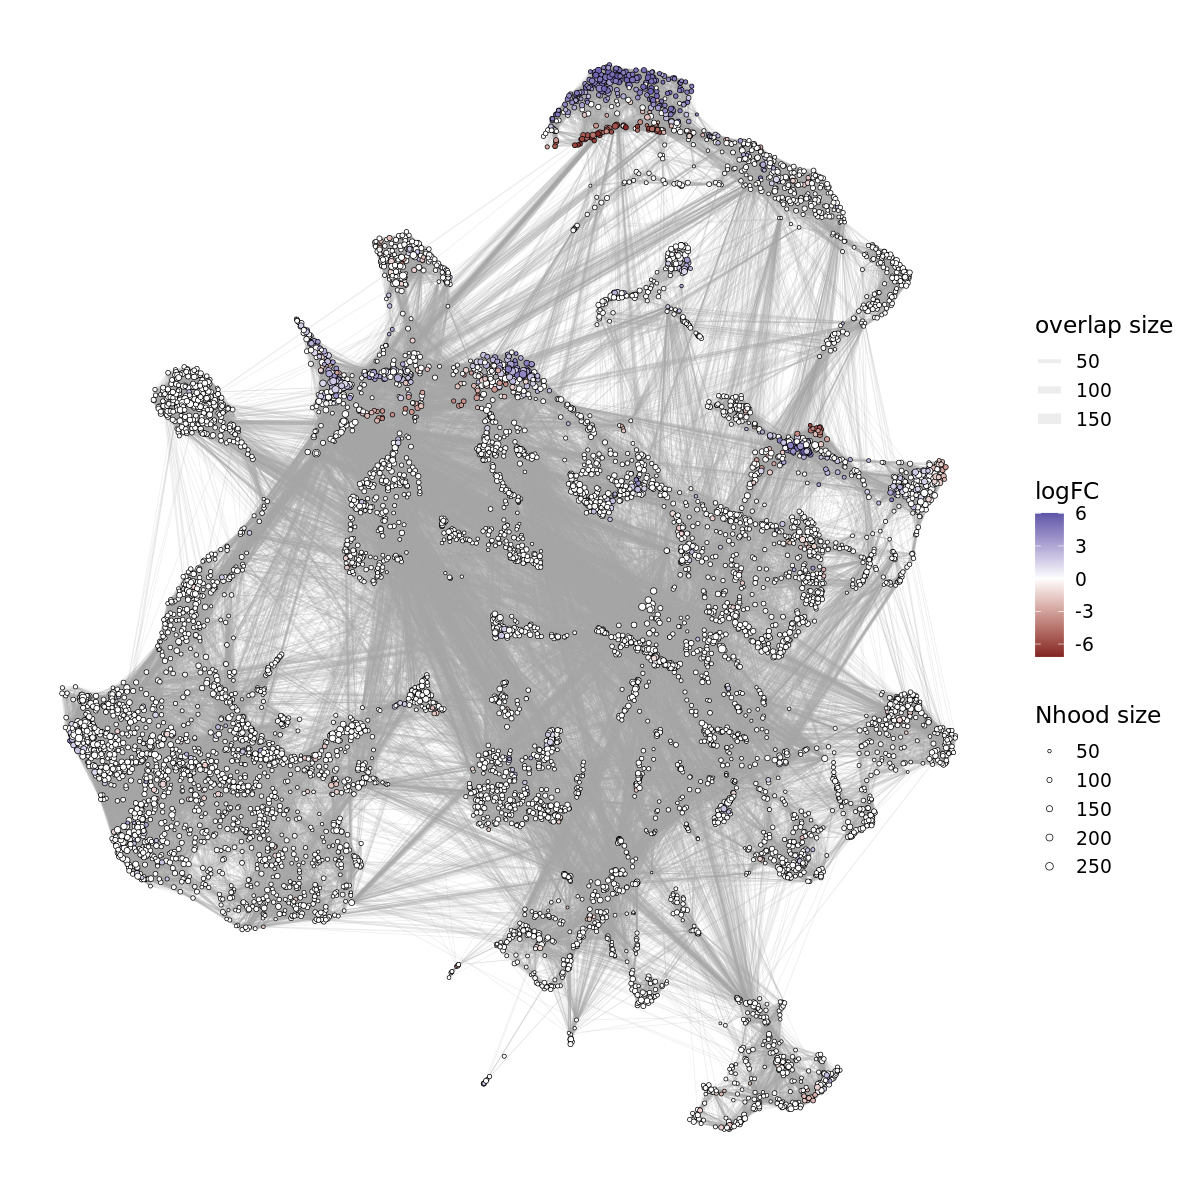

In [637]:
options(repr.plot.width=10, repr.plot.height=10)
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

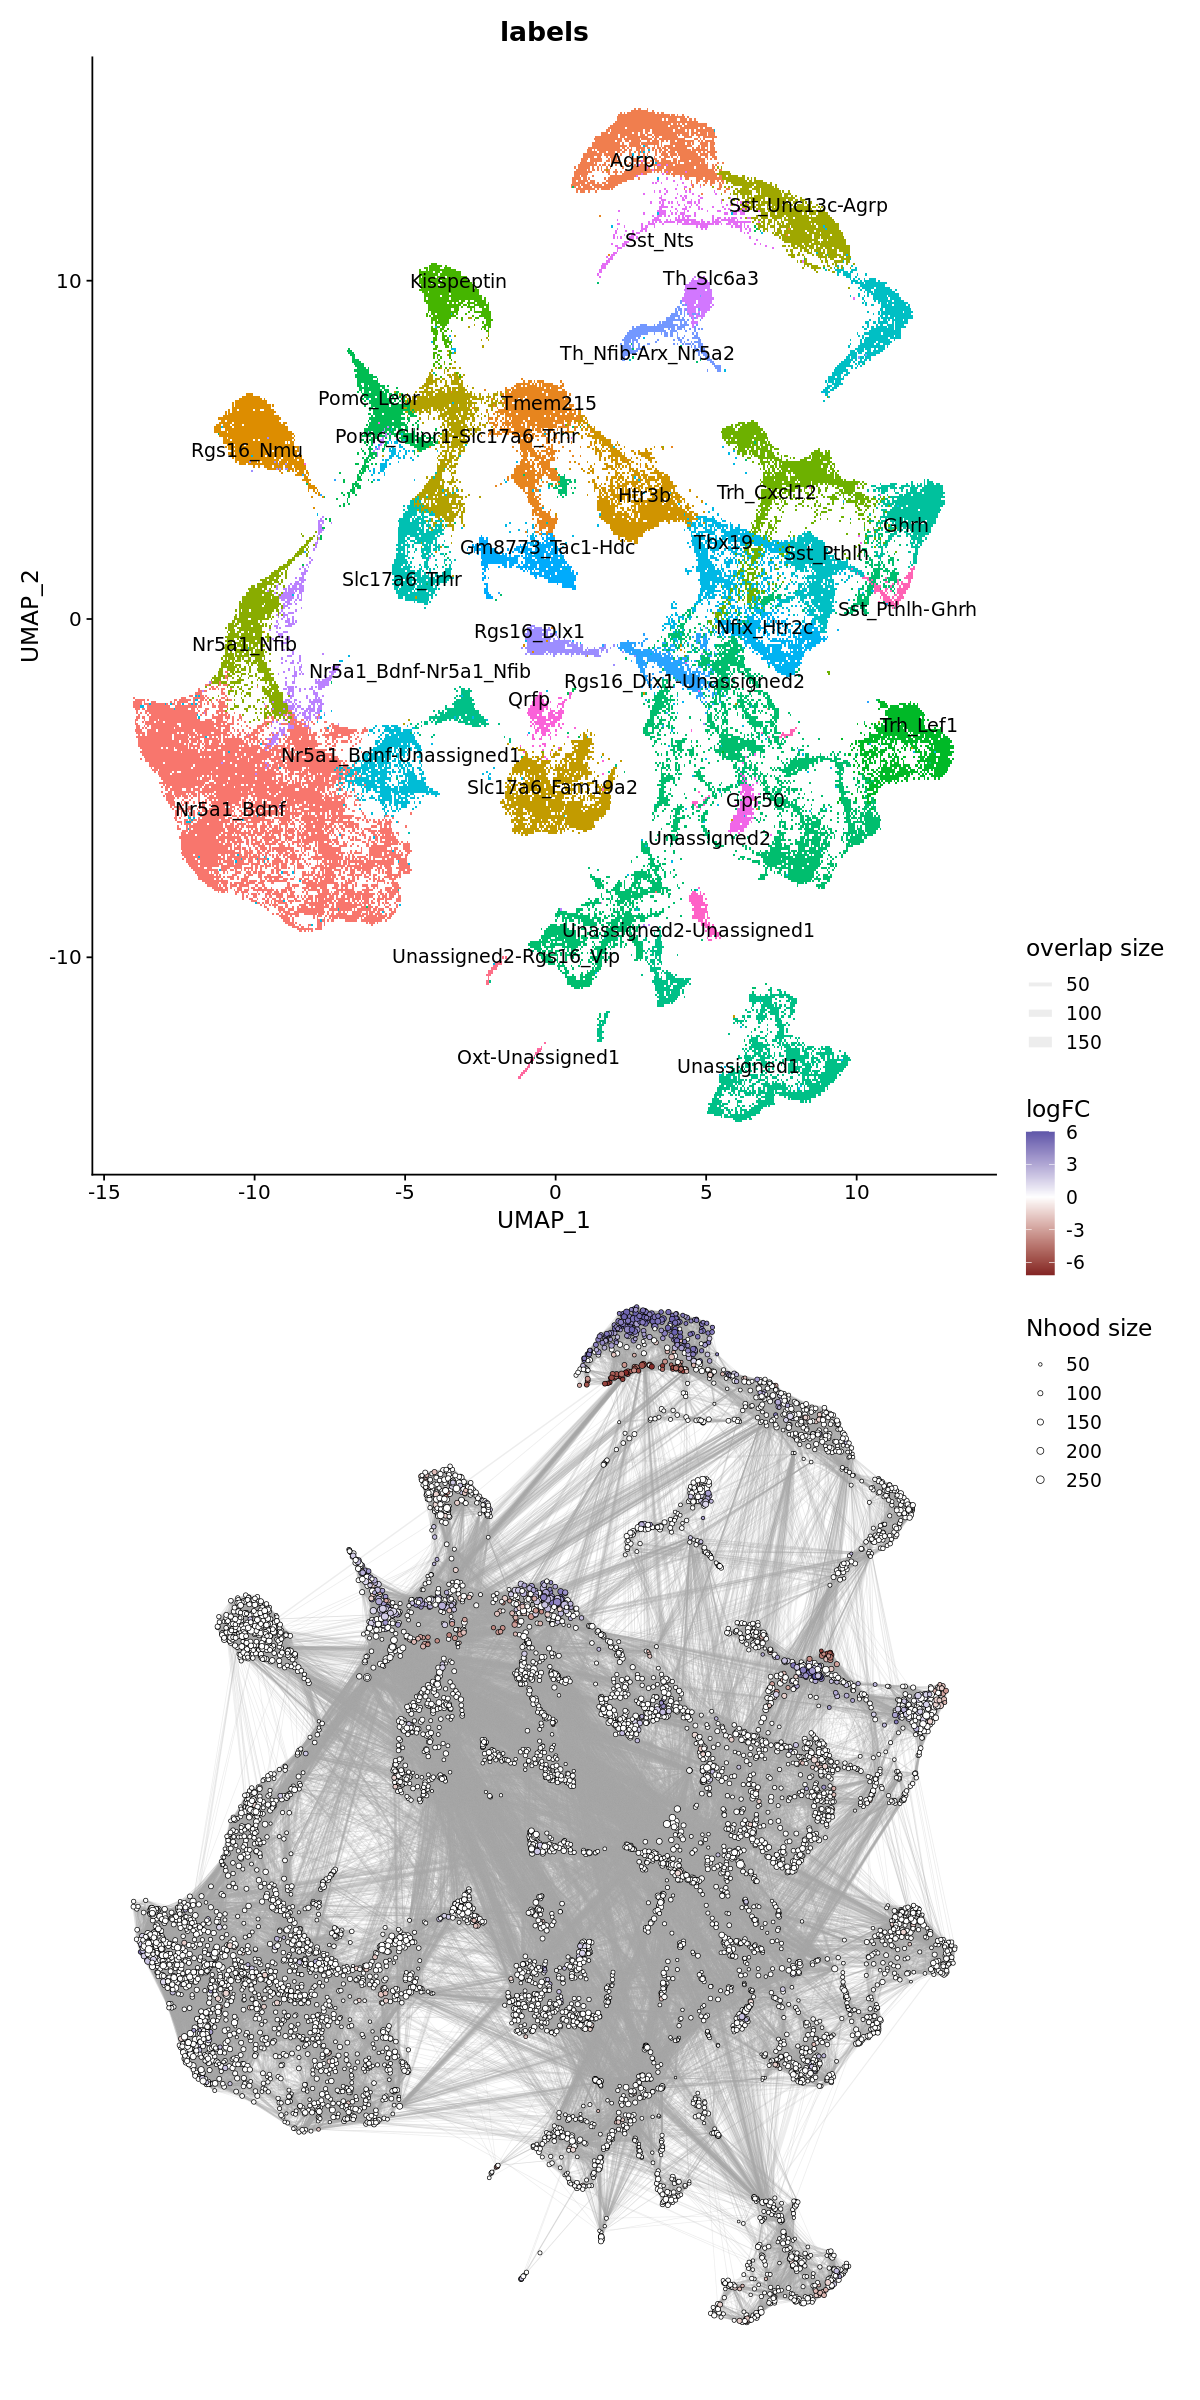

In [638]:
options(repr.plot.width=10, repr.plot.height=20)
umap_plot / nh_graph_pl +
  plot_layout(guides="collect")

In [639]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = "labels")
head(da_results)

logFC      logCPM   F         PValue     FDR       Nhood SpatialFDR labels      labels_fraction
1 -0.3713711 8.258100 0.6150342 0.43412780 0.7765341 1     0.7544704  Nfix_Htr2c  1.0000000      
2  1.7643908 7.866893 5.2029424 0.02403566 0.1622672 2     0.1434634  Unassigned1 1.0000000      
3  0.9582669 8.368826 3.4388512 0.06563150 0.3081739 3     0.2802317  Th_Slc6a3   1.0000000      
4 -0.2813174 7.705426 0.2183972 0.64093795 0.8870785 4     0.8746670  Rgs16_Dlx1  1.0000000      
5 -0.5808303 8.042283 1.5114689 0.22082839 0.5906176 5     0.5593142  Rgs16_Nmu   1.0000000      
6  0.3761135 7.748047 0.3686957 0.54473975 0.8401782 6     0.8252547  Unassigned2 0.9726027

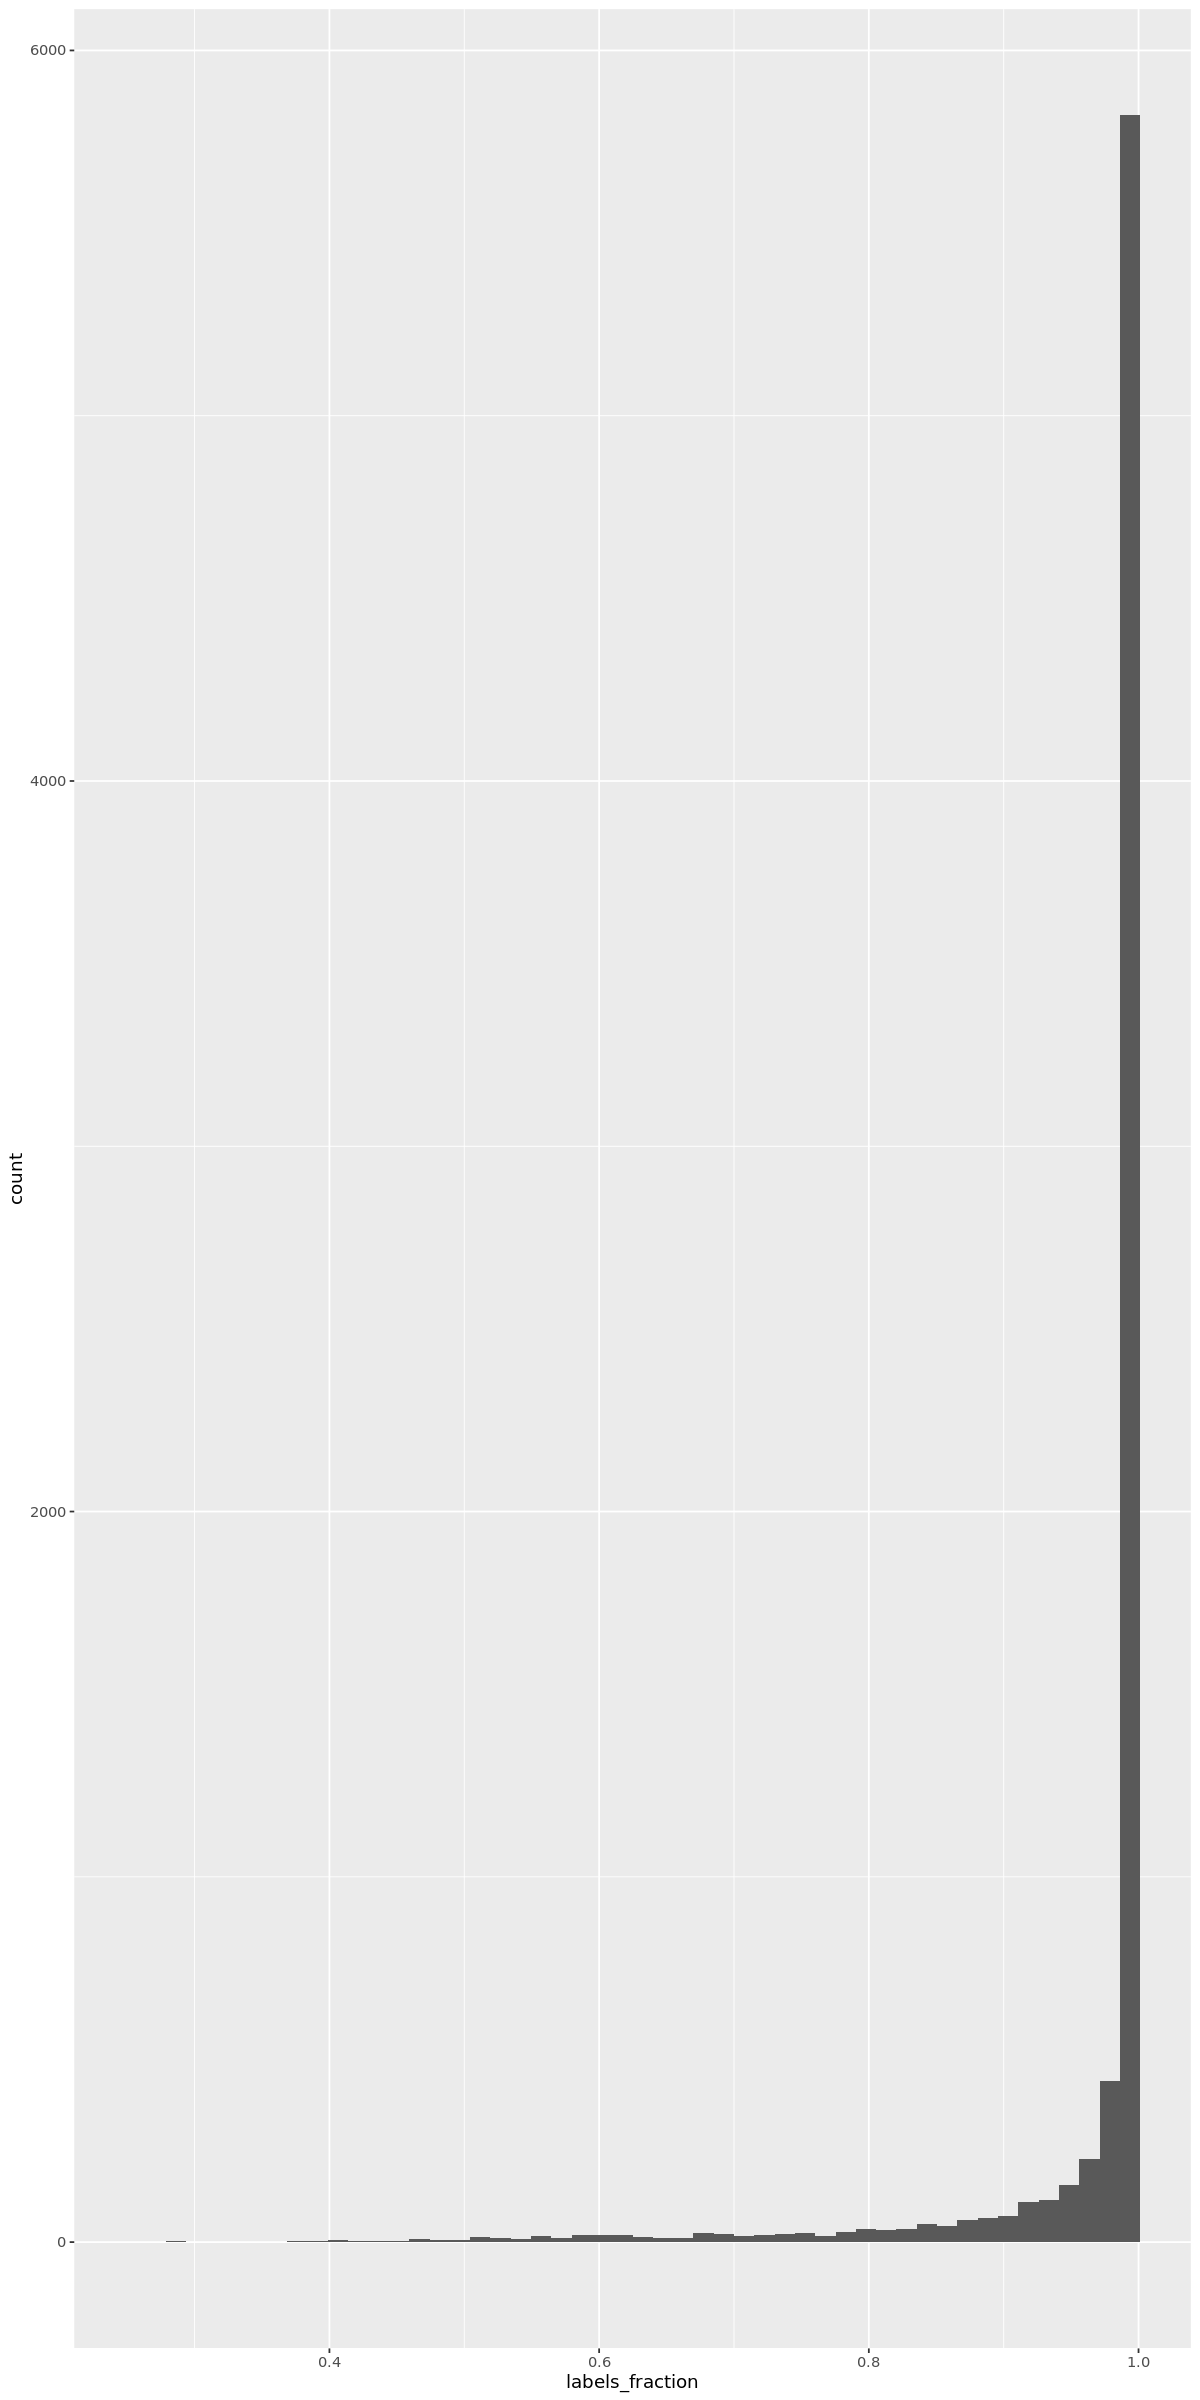

In [640]:
#we want to set a threshold to exclude neighbourhoods with a mix of cell types
ggplot(da_results, aes(labels_fraction)) + geom_histogram(bins=50)

In [641]:
da_results$labels <- ifelse(da_results$labels_fraction < 0.7, "Mixed", da_results$labels)

In [642]:
all_nhood = da_results %>%
group_by(labels) %>% 
summarise(n = n()) %>%
arrange(desc(n))

sig_nhood = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("significant" = "n")


sig_up = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] > 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("up" = "n") %>%
tidyr::complete()

sig_down = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] < 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("down" = "n") %>%
tidyr::complete()

nhood_summary = plyr::join_all(list(all_nhood, sig_nhood, sig_up, sig_down), by = 'labels')
nhood_summary = nhood_summary %>% arrange(n)
# nhood_summary = nhood_summary %>% arrange(significant)
nhood_summary$labels = factor(nhood_summary$labels, levels=nhood_summary$labels)
nhood_summary = nhood_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_nhoods")

In [643]:
dput(levels(nhood_summary$labels))

c("Oxt-Unassigned1", "Unassigned2-Rgs16_Vip", "Sst_Pthlh-Ghrh", 
"Unassigned2-Unassigned1", "Qrfp", "Sst_Nts", "Gpr50", "Th_Slc6a3", 
"Rgs16_Dlx1", "Nr5a1_Bdnf-Nr5a1_Nfib", "Th_Nfib-Arx_Nr5a2", "Rgs16_Dlx1-Unassigned2", 
"Nfix_Htr2c", "Nr5a1_Bdnf-Unassigned1", "Gm8773_Tac1-Hdc", "Ghrh", 
"Pomc_Lepr", "Slc17a6_Trhr", "Kisspeptin", "Tbx19", "Pomc_Glipr1-Slc17a6_Trhr", 
"Trh_Lef1", "Nr5a1_Nfib", "Sst_Unc13c-Agrp", "Trh_Cxcl12", "Htr3b", 
"Mixed", "Tmem215", "Rgs16_Nmu", "Agrp", "Slc17a6_Fam19a2", "Sst_Pthlh", 
"Unassigned1", "Unassigned2", "Nr5a1_Bdnf")


In [644]:
da_results$labels = factor(da_results$labels, levels=levels(nhood_summary$labels))

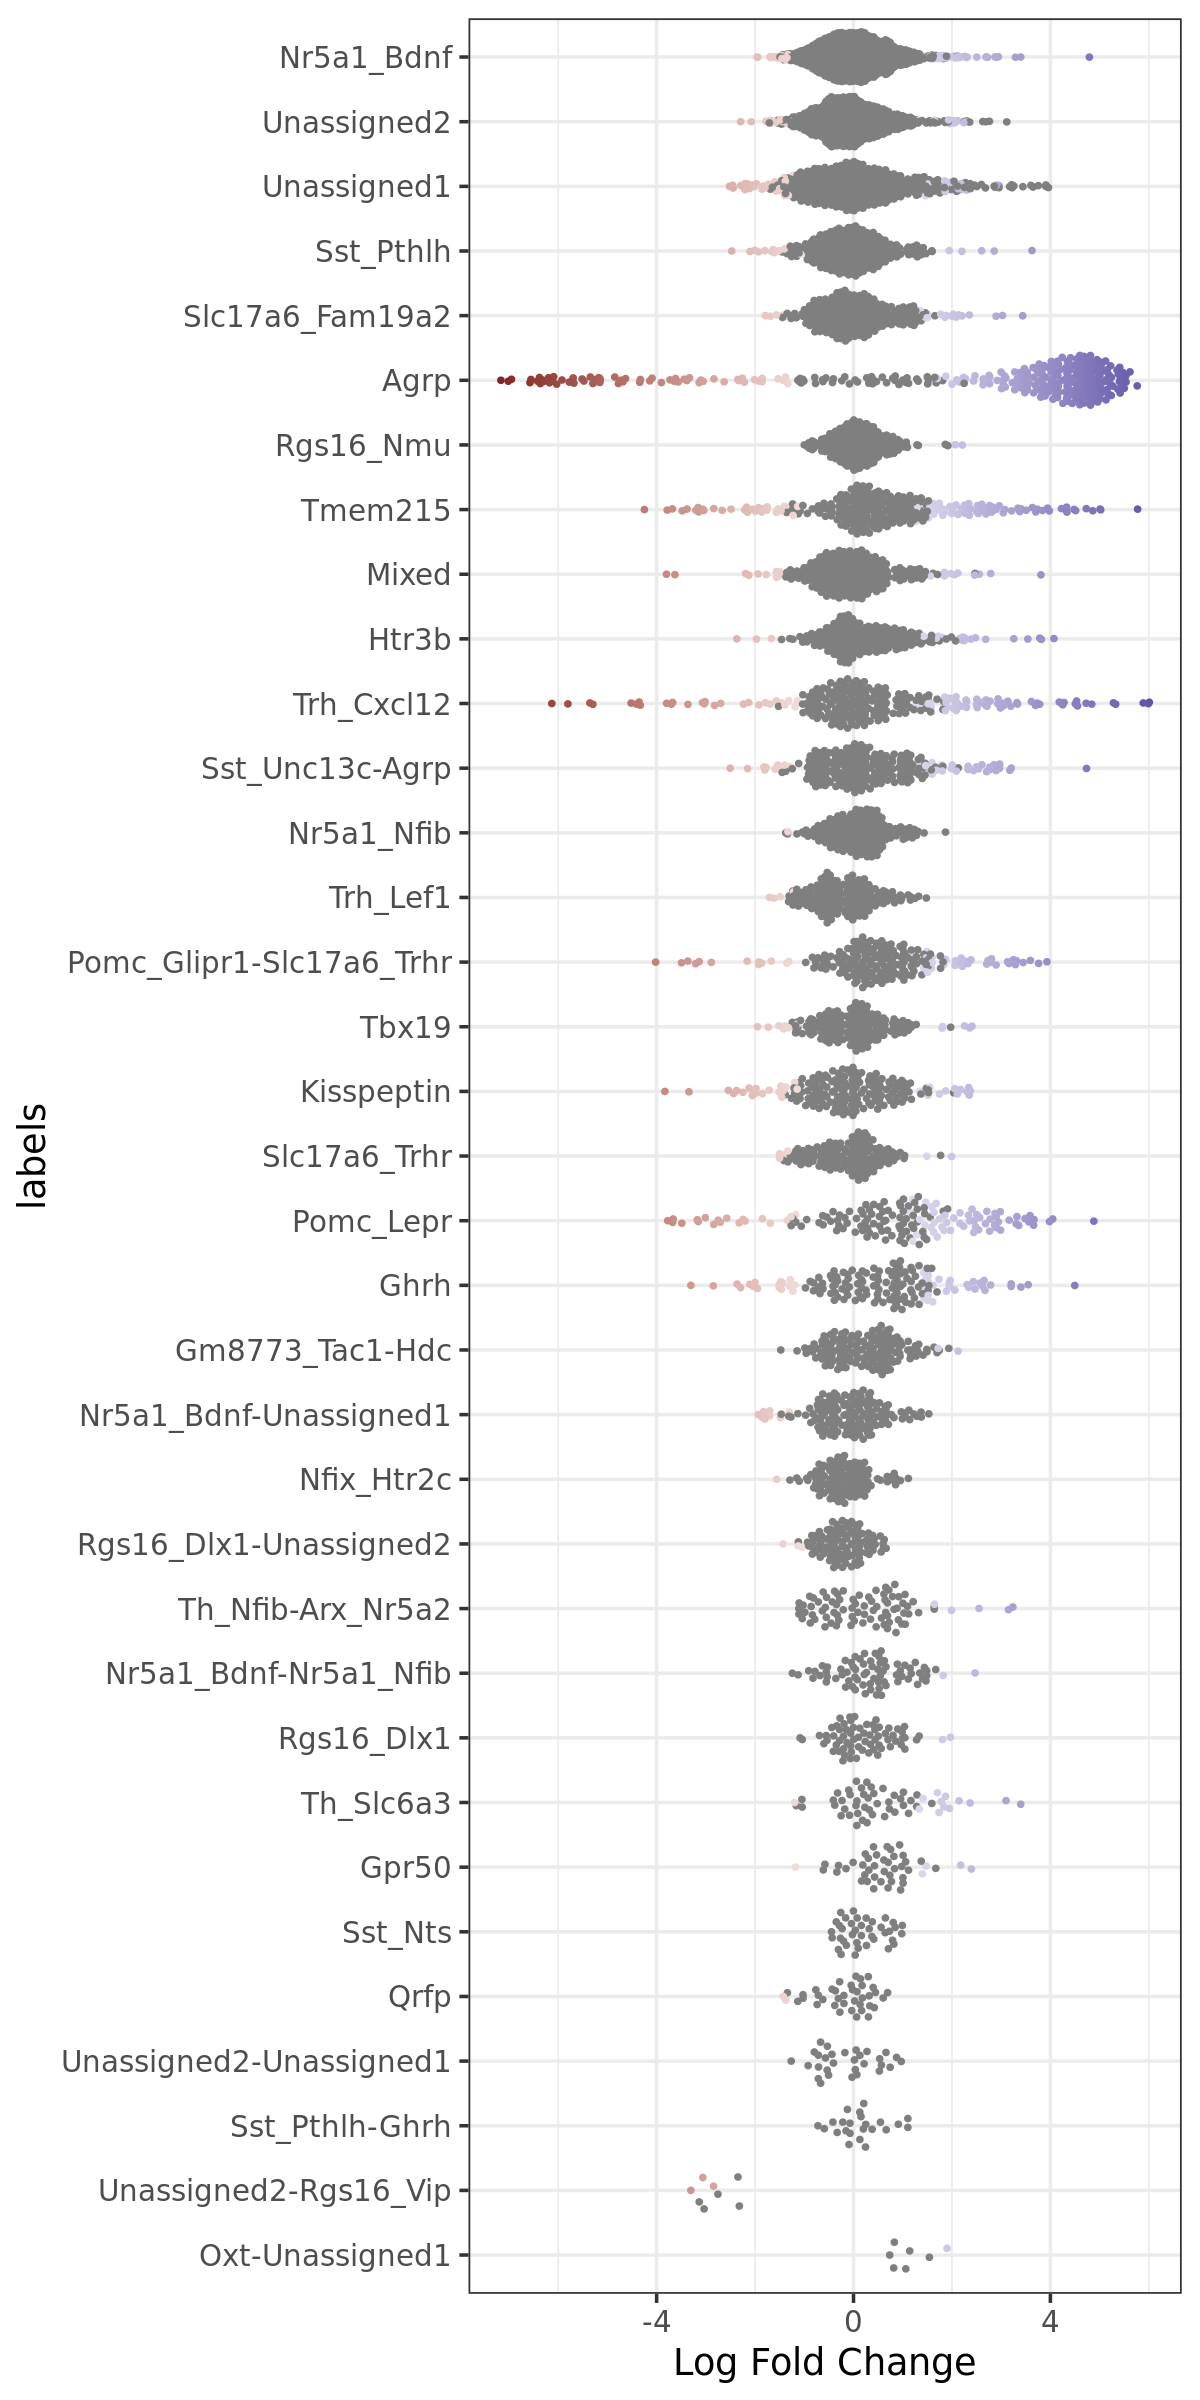

In [645]:
options(repr.plot.width=10, repr.plot.height=20)
pdab = plotDAbeeswarm(da_results, group.by = "labels", )
pdab

In [646]:
head(da_results)

logFC      logCPM   F         PValue     FDR       Nhood SpatialFDR labels      labels_fraction
1 -0.3713711 8.258100 0.6150342 0.43412780 0.7765341 1     0.7544704  Nfix_Htr2c  1.0000000      
2  1.7643908 7.866893 5.2029424 0.02403566 0.1622672 2     0.1434634  Unassigned1 1.0000000      
3  0.9582669 8.368826 3.4388512 0.06563150 0.3081739 3     0.2802317  Th_Slc6a3   1.0000000      
4 -0.2813174 7.705426 0.2183972 0.64093795 0.8870785 4     0.8746670  Rgs16_Dlx1  1.0000000      
5 -0.5808303 8.042283 1.5114689 0.22082839 0.5906176 5     0.5593142  Rgs16_Nmu   1.0000000      
6  0.3761135 7.748047 0.3686957 0.54473975 0.8401782 6     0.8252547  Unassigned2 0.9726027

In [647]:
# neuron_clusters_summary = obj_neuron@meta.data %>%
#     group_by(labels) %>%
#     summarise(n = n()) %>%
#     arrange(desc(n))

In [648]:
nhood_summary = plyr::join_all(list(all_nhood, sig_nhood, sig_up, sig_down), by = 'labels')
nhood_summary = nhood_summary %>% arrange(n)
# nhood_summary = nhood_summary %>% arrange(significant)
nhood_summary$labels = factor(nhood_summary$labels, levels=nhood_summary$labels)
nhood_summary = nhood_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_nhoods")
nhood_summary

labels                   n    significant direction n_nhoods
1  Oxt-Unassigned1            7   1          up         1      
2  Oxt-Unassigned1            7   1          down       0      
3  Unassigned2-Rgs16_Vip      8   3          up         0      
4  Unassigned2-Rgs16_Vip      8   3          down       3      
5  Sst_Pthlh-Ghrh            23   0          up         0      
6  Sst_Pthlh-Ghrh            23   0          down       0      
7  Unassigned2-Unassigned1   30   0          up         0      
8  Unassigned2-Unassigned1   30   0          down       0      
9  Qrfp                      39   2          up         0      
10 Qrfp                      39   2          down       2      
11 Sst_Nts                   39   0          up         0      
12 Sst_Nts                   39   0          down       0      
13 Gpr50                     44   5          up         4      
14 Gpr50                     44   5          down       1      
15 Th_Slc6a3                 56  13          up        12      
16 Th_Slc6a3                 56  13          down       1      
17 Rgs16_Dlx1                69   2          up         2      
18 Rgs16_Dlx1                69   2          down       0      
19 Nr5a1_Bdnf-Nr5a1_Nfib     73   2          up         2      
20 Nr5a1_Bdnf-Nr5a1_Nfib     73   2          down       0      
21 Th_Nfib-Arx_Nr5a2         83   5          up         5      
22 Th_Nfib-Arx_Nr5a2         83   5          down       0      
23 Rgs16_Dlx1-Unassigned2   100   3          up         0      
24 Rgs16_Dlx1-Unassigned2   100   3          down       3      
25 Nfix_Htr2c               115   1          up         0      
26 Nfix_Htr2c               115   1          down       1      
27 Nr5a1_Bdnf-Unassigned1   141   9          up         0      
28 Nr5a1_Bdnf-Unassigned1   141   9          down       9      
29 Gm8773_Tac1-Hdc          144   2          up         2      
30 Gm8773_Tac1-Hdc          144   2          down       0      
⋮  ⋮                        ⋮    ⋮           ⋮         ⋮       
41 Pomc_Glipr1-Slc17a6_Trhr  185  45         up         32     
42 Pomc_Glipr1-Slc17a6_Trhr  185  45         down       13     
43 Trh_Lef1                  204   4         up          0     
44 Trh_Lef1                  204   4         down        4     
45 Nr5a1_Nfib                207   1         up          0     
46 Nr5a1_Nfib                207   1         down        1     
47 Sst_Unc13c-Agrp           226  39         up         28     
48 Sst_Unc13c-Agrp           226  39         down       11     
49 Trh_Cxcl12                247  83         up         55     
50 Trh_Cxcl12                247  83         down       28     
51 Htr3b                     253  20         up         17     
52 Htr3b                     253  20         down        3     
53 Mixed                     256  21         up         10     
54 Mixed                     256  21         down       11     
55 Tmem215                   279  98         up         67     
56 Tmem215                   279  98         down       31     
57 Rgs16_Nmu                 294   2         up          2     
58 Rgs16_Nmu                 294   2         down        0     
59 Agrp                      312 267         up        203     
60 Agrp                      312 267         down       64     
61 Slc17a6_Fam19a2           314  21         up         16     
62 Slc17a6_Fam19a2           314  21         down        5     
63 Sst_Pthlh                 335  17         up          5     
64 Sst_Pthlh                 335  17         down       12     
65 Unassigned1               448  43         up         12     
66 Unassigned1               448  43         down       31     
67 Unassigned2               880  31         up         14     
68 Unassigned2               880  31         down       17     
69 Nr5a1_Bdnf               1418  61         up         39     
70 Nr5a1_Bdnf               1418  61         down       22

Scale for 'fill' is already present. Adding another scale for 'fill', which will replace the existing scale.



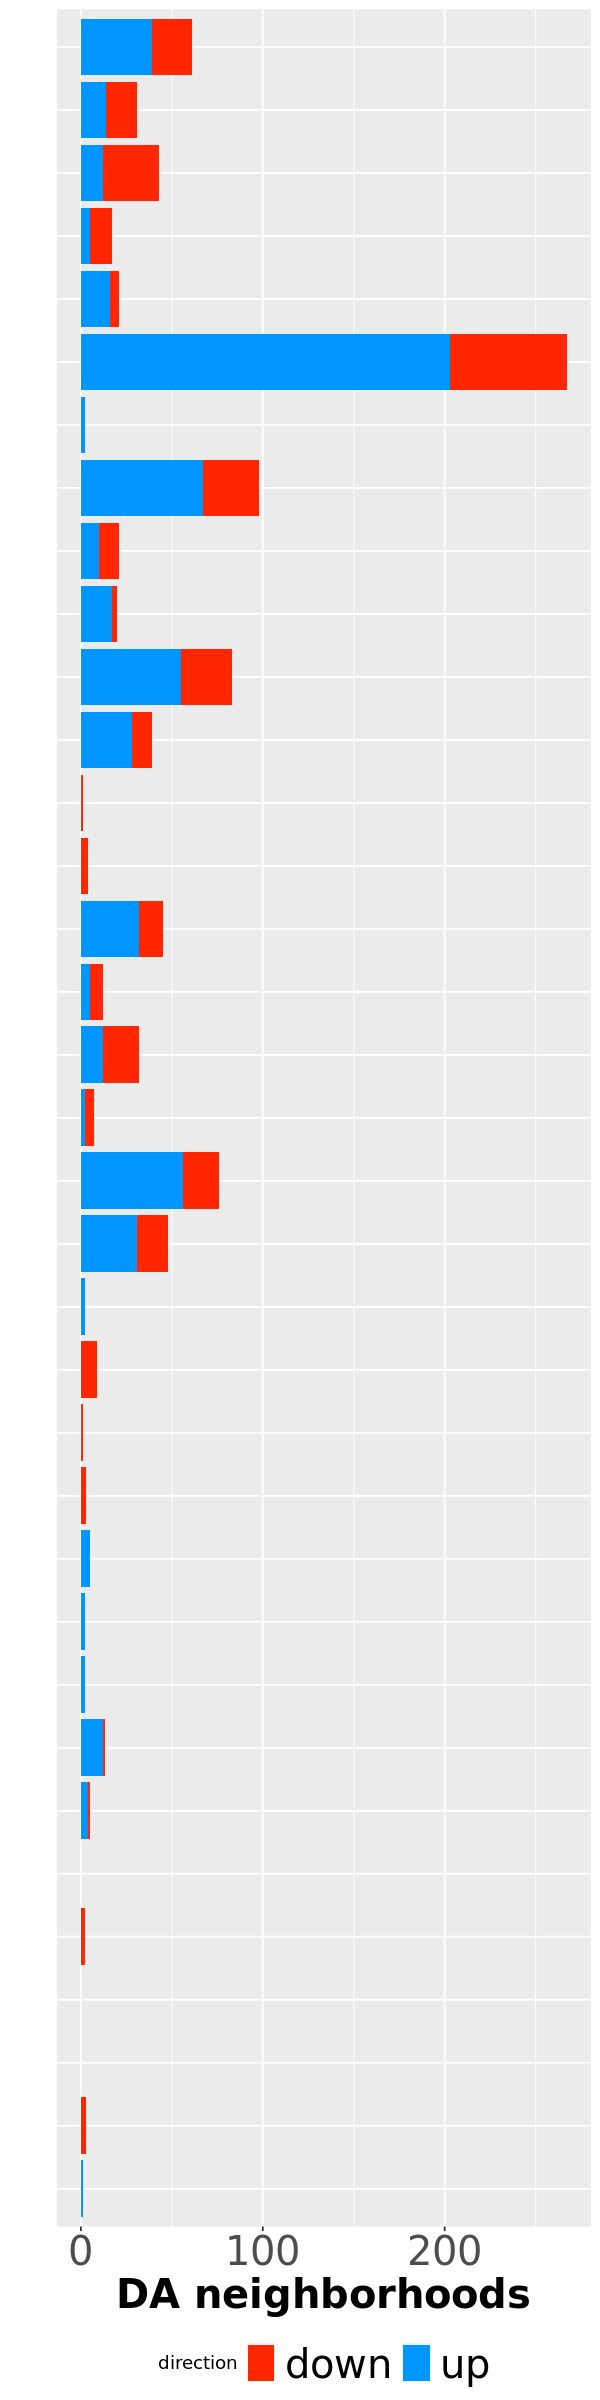

In [649]:
options(repr.plot.width=5, repr.plot.height=20)
dap = ggplot(nhood_summary, aes(fill=direction, y=labels, x=n_nhoods)) + 
    geom_bar(position="stack", stat="identity") +
    xlab("DA neighborhoods") + 
    ylab("") + 
    theme(axis.text=element_text(size=24),
          axis.title=element_text(size=24,face="bold"),
          legend.text=element_text(size=24),
          legend.position="bottom", 
                 axis.text.y=element_blank(),
         axis.ticks.y=element_blank() ) + 

    scale_fill_discrete(name = "") +
  scale_fill_manual(values=c("#FF2600",
                             "#0096FF"))

dap

In [650]:
degs = readr::read_csv('../00_preprocessing/degs_neuron.csv')

Rows: 617256 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): id, cluster_name, comparison
dbl (5): logFC, logCPM, F, PValue, FDR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [651]:
degs = degs %>%
filter(comparison == '1*groupFGF1.Day14 -1*groupVeh_PF.Day14') %>%
filter(FDR < 0.05)
degs$cluster_name = factor(degs$cluster_name, levels=unique(nhood_summary$labels))
head(degs)

id            cluster_name comparison                             logFC      logCPM   F        PValue      
1 1500009L16Rik Tmem215      1*groupFGF1.Day14 -1*groupVeh_PF.Day14  0.5158374 6.251650 29.88323 3.000331e-06
2 Dsel          Tmem215      1*groupFGF1.Day14 -1*groupVeh_PF.Day14 -0.7380503 3.757519 26.80284 6.994066e-06
3 Grm8          Gpr50        1*groupFGF1.Day14 -1*groupVeh_PF.Day14 -0.5698491 9.774103 35.48627 3.477976e-07
  FDR        
1 0.033315677
2 0.038831052
3 0.002418585

In [652]:
nhood_summary

labels                   n    significant direction n_nhoods
1  Oxt-Unassigned1            7   1          up         1      
2  Oxt-Unassigned1            7   1          down       0      
3  Unassigned2-Rgs16_Vip      8   3          up         0      
4  Unassigned2-Rgs16_Vip      8   3          down       3      
5  Sst_Pthlh-Ghrh            23   0          up         0      
6  Sst_Pthlh-Ghrh            23   0          down       0      
7  Unassigned2-Unassigned1   30   0          up         0      
8  Unassigned2-Unassigned1   30   0          down       0      
9  Qrfp                      39   2          up         0      
10 Qrfp                      39   2          down       2      
11 Sst_Nts                   39   0          up         0      
12 Sst_Nts                   39   0          down       0      
13 Gpr50                     44   5          up         4      
14 Gpr50                     44   5          down       1      
15 Th_Slc6a3                 56  13          up        12      
16 Th_Slc6a3                 56  13          down       1      
17 Rgs16_Dlx1                69   2          up         2      
18 Rgs16_Dlx1                69   2          down       0      
19 Nr5a1_Bdnf-Nr5a1_Nfib     73   2          up         2      
20 Nr5a1_Bdnf-Nr5a1_Nfib     73   2          down       0      
21 Th_Nfib-Arx_Nr5a2         83   5          up         5      
22 Th_Nfib-Arx_Nr5a2         83   5          down       0      
23 Rgs16_Dlx1-Unassigned2   100   3          up         0      
24 Rgs16_Dlx1-Unassigned2   100   3          down       3      
25 Nfix_Htr2c               115   1          up         0      
26 Nfix_Htr2c               115   1          down       1      
27 Nr5a1_Bdnf-Unassigned1   141   9          up         0      
28 Nr5a1_Bdnf-Unassigned1   141   9          down       9      
29 Gm8773_Tac1-Hdc          144   2          up         2      
30 Gm8773_Tac1-Hdc          144   2          down       0      
⋮  ⋮                        ⋮    ⋮           ⋮         ⋮       
41 Pomc_Glipr1-Slc17a6_Trhr  185  45         up         32     
42 Pomc_Glipr1-Slc17a6_Trhr  185  45         down       13     
43 Trh_Lef1                  204   4         up          0     
44 Trh_Lef1                  204   4         down        4     
45 Nr5a1_Nfib                207   1         up          0     
46 Nr5a1_Nfib                207   1         down        1     
47 Sst_Unc13c-Agrp           226  39         up         28     
48 Sst_Unc13c-Agrp           226  39         down       11     
49 Trh_Cxcl12                247  83         up         55     
50 Trh_Cxcl12                247  83         down       28     
51 Htr3b                     253  20         up         17     
52 Htr3b                     253  20         down        3     
53 Mixed                     256  21         up         10     
54 Mixed                     256  21         down       11     
55 Tmem215                   279  98         up         67     
56 Tmem215                   279  98         down       31     
57 Rgs16_Nmu                 294   2         up          2     
58 Rgs16_Nmu                 294   2         down        0     
59 Agrp                      312 267         up        203     
60 Agrp                      312 267         down       64     
61 Slc17a6_Fam19a2           314  21         up         16     
62 Slc17a6_Fam19a2           314  21         down        5     
63 Sst_Pthlh                 335  17         up          5     
64 Sst_Pthlh                 335  17         down       12     
65 Unassigned1               448  43         up         12     
66 Unassigned1               448  43         down       31     
67 Unassigned2               880  31         up         14     
68 Unassigned2               880  31         down       17     
69 Nr5a1_Bdnf               1418  61         up         39     
70 Nr5a1_Bdnf               1418  61         down       22

In [653]:
degs_up = degs %>%
filter(logFC > 0) %>%
mutate(across("cluster_name", as.factor)) %>%
group_by(cluster_name, .drop=FALSE) %>% 
summarise(up = n())

degs_down = degs %>%
filter(logFC < 0) %>%
mutate(across("cluster_name", as.factor)) %>%
group_by(cluster_name, .drop=FALSE) %>% 
summarise(down = n())

degs_summary = plyr::join_all(list(degs_up, degs_down), by = 'cluster_name')
degs_summary = degs_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_degs")
degs_summary

cluster_name             direction n_degs
1  Oxt-Unassigned1          up        0     
2  Oxt-Unassigned1          down      0     
3  Unassigned2-Rgs16_Vip    up        0     
4  Unassigned2-Rgs16_Vip    down      0     
5  Sst_Pthlh-Ghrh           up        0     
6  Sst_Pthlh-Ghrh           down      0     
7  Unassigned2-Unassigned1  up        0     
8  Unassigned2-Unassigned1  down      0     
9  Qrfp                     up        0     
10 Qrfp                     down      0     
11 Sst_Nts                  up        0     
12 Sst_Nts                  down      0     
13 Gpr50                    up        0     
14 Gpr50                    down      1     
15 Th_Slc6a3                up        0     
16 Th_Slc6a3                down      0     
17 Rgs16_Dlx1               up        0     
18 Rgs16_Dlx1               down      0     
19 Nr5a1_Bdnf-Nr5a1_Nfib    up        0     
20 Nr5a1_Bdnf-Nr5a1_Nfib    down      0     
21 Th_Nfib-Arx_Nr5a2        up        0     
22 Th_Nfib-Arx_Nr5a2        down      0     
23 Rgs16_Dlx1-Unassigned2   up        0     
24 Rgs16_Dlx1-Unassigned2   down      0     
25 Nfix_Htr2c               up        0     
26 Nfix_Htr2c               down      0     
27 Nr5a1_Bdnf-Unassigned1   up        0     
28 Nr5a1_Bdnf-Unassigned1   down      0     
29 Gm8773_Tac1-Hdc          up        0     
30 Gm8773_Tac1-Hdc          down      0     
⋮  ⋮                        ⋮         ⋮     
41 Pomc_Glipr1-Slc17a6_Trhr up        0     
42 Pomc_Glipr1-Slc17a6_Trhr down      0     
43 Trh_Lef1                 up        0     
44 Trh_Lef1                 down      0     
45 Nr5a1_Nfib               up        0     
46 Nr5a1_Nfib               down      0     
47 Sst_Unc13c-Agrp          up        0     
48 Sst_Unc13c-Agrp          down      0     
49 Trh_Cxcl12               up        0     
50 Trh_Cxcl12               down      0     
51 Htr3b                    up        0     
52 Htr3b                    down      0     
53 Mixed                    up        0     
54 Mixed                    down      0     
55 Tmem215                  up        1     
56 Tmem215                  down      1     
57 Rgs16_Nmu                up        0     
58 Rgs16_Nmu                down      0     
59 Agrp                     up        0     
60 Agrp                     down      0     
61 Slc17a6_Fam19a2          up        0     
62 Slc17a6_Fam19a2          down      0     
63 Sst_Pthlh                up        0     
64 Sst_Pthlh                down      0     
65 Unassigned1              up        0     
66 Unassigned1              down      0     
67 Unassigned2              up        0     
68 Unassigned2              down      0     
69 Nr5a1_Bdnf               up        0     
70 Nr5a1_Bdnf               down      0

Scale for 'fill' is already present. Adding another scale for 'fill', which will replace the existing scale.



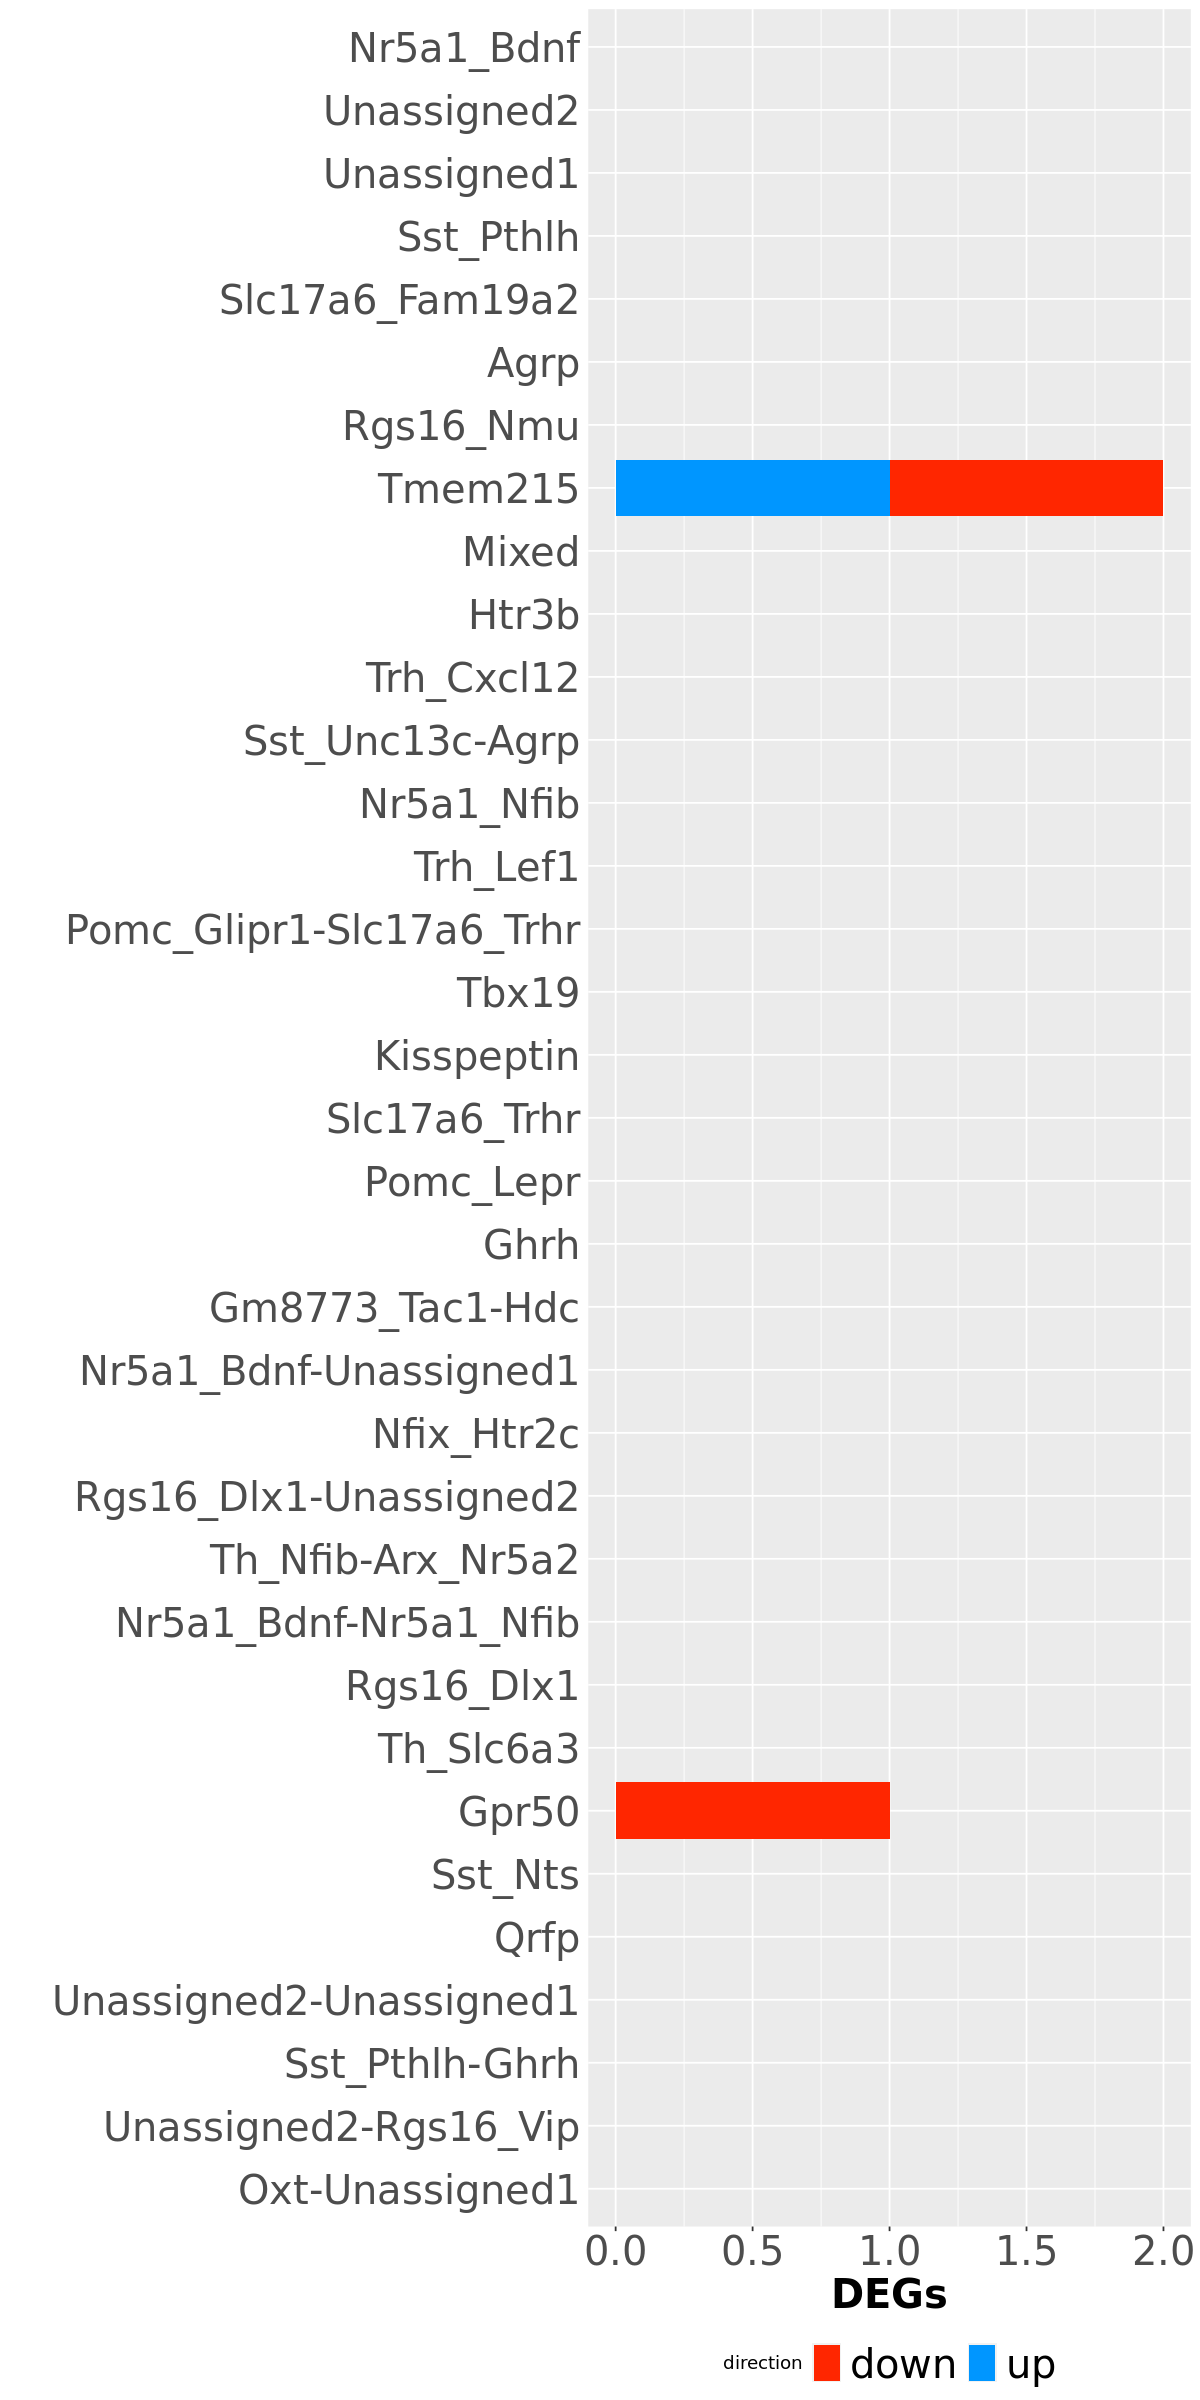

In [654]:
options(repr.plot.width=10, repr.plot.height=20)
dgp = ggplot(degs_summary, aes(fill=direction, y=cluster_name, x=n_degs)) + 
    geom_bar(position="stack", stat="identity") +
    xlab("DEGs") + 
    ylab("") + 
    theme(axis.text=element_text(size=24),
          axis.title=element_text(size=24,face="bold"),
          legend.text=element_text(size=24),
          legend.position="bottom", 
#                  axis.text.y=element_blank(),
         axis.ticks.y=element_blank() ) + 

    scale_fill_discrete(name = "")+
  scale_fill_manual(values=c("#FF2600",
                             "#0096FF"))

dgp

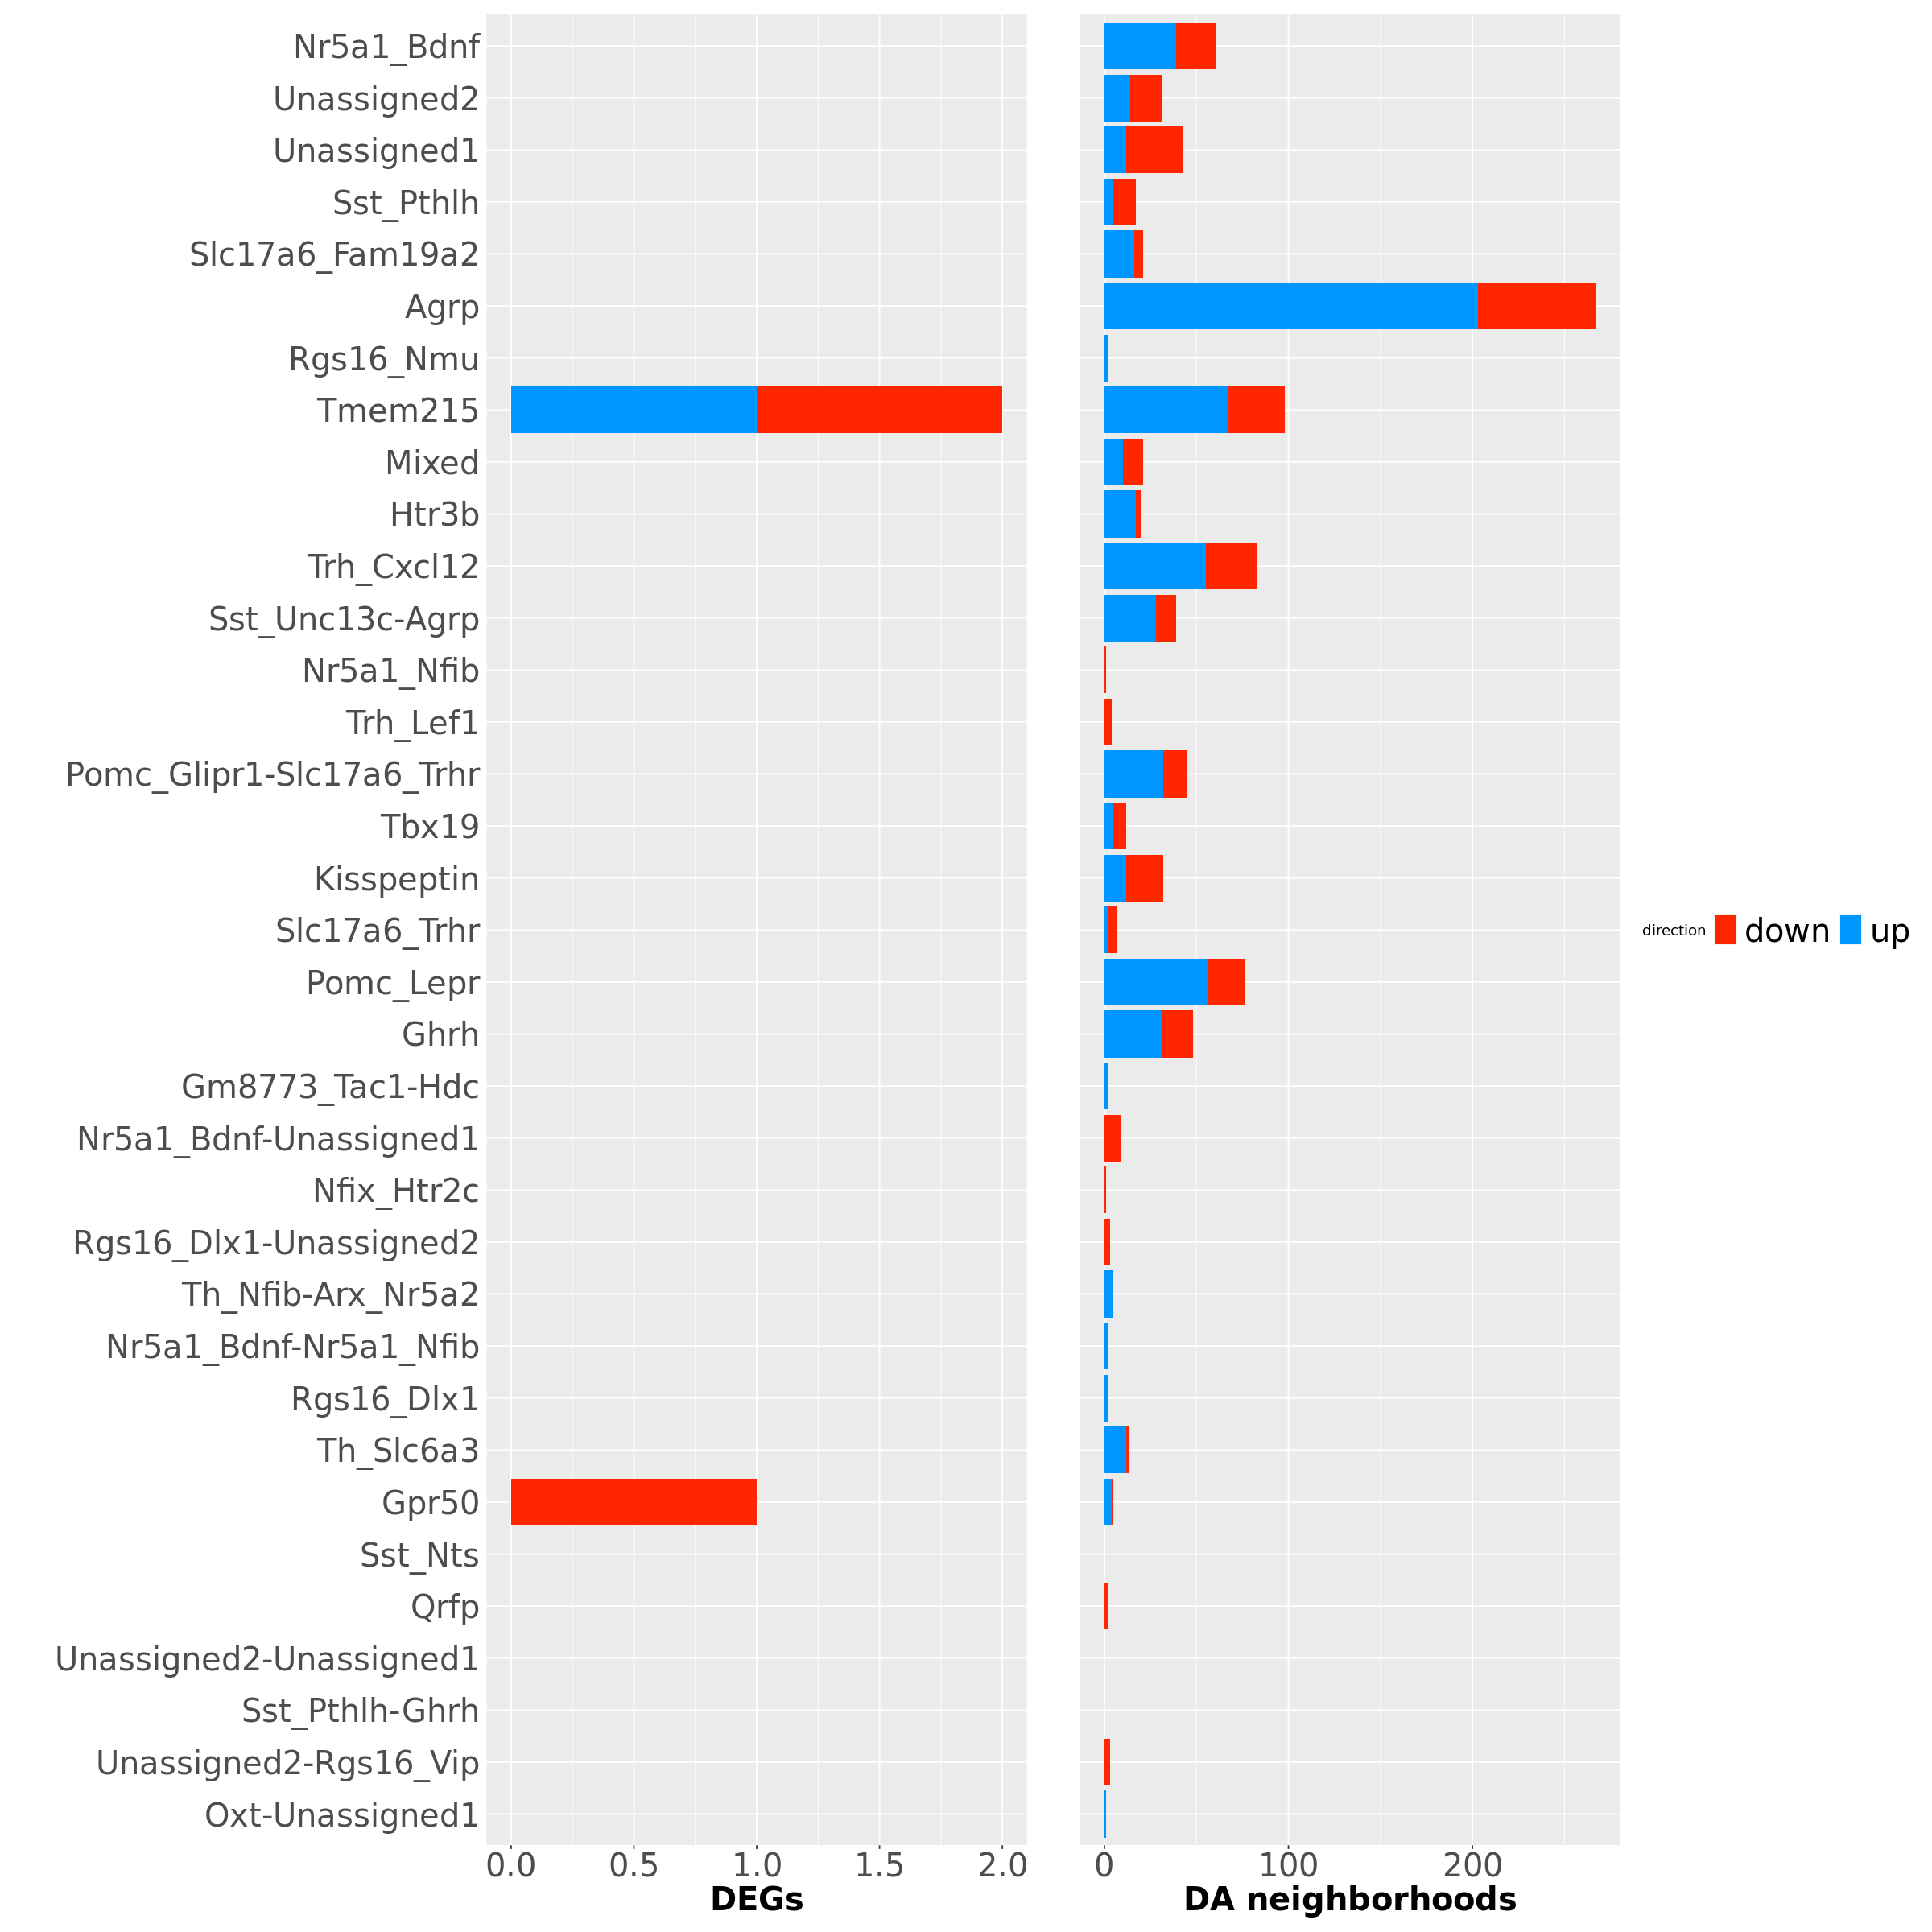

In [655]:
options(repr.plot.width=20, repr.plot.height=20)
dgp + dap +
  plot_layout(guides="collect") + theme(legend.position="bottom")

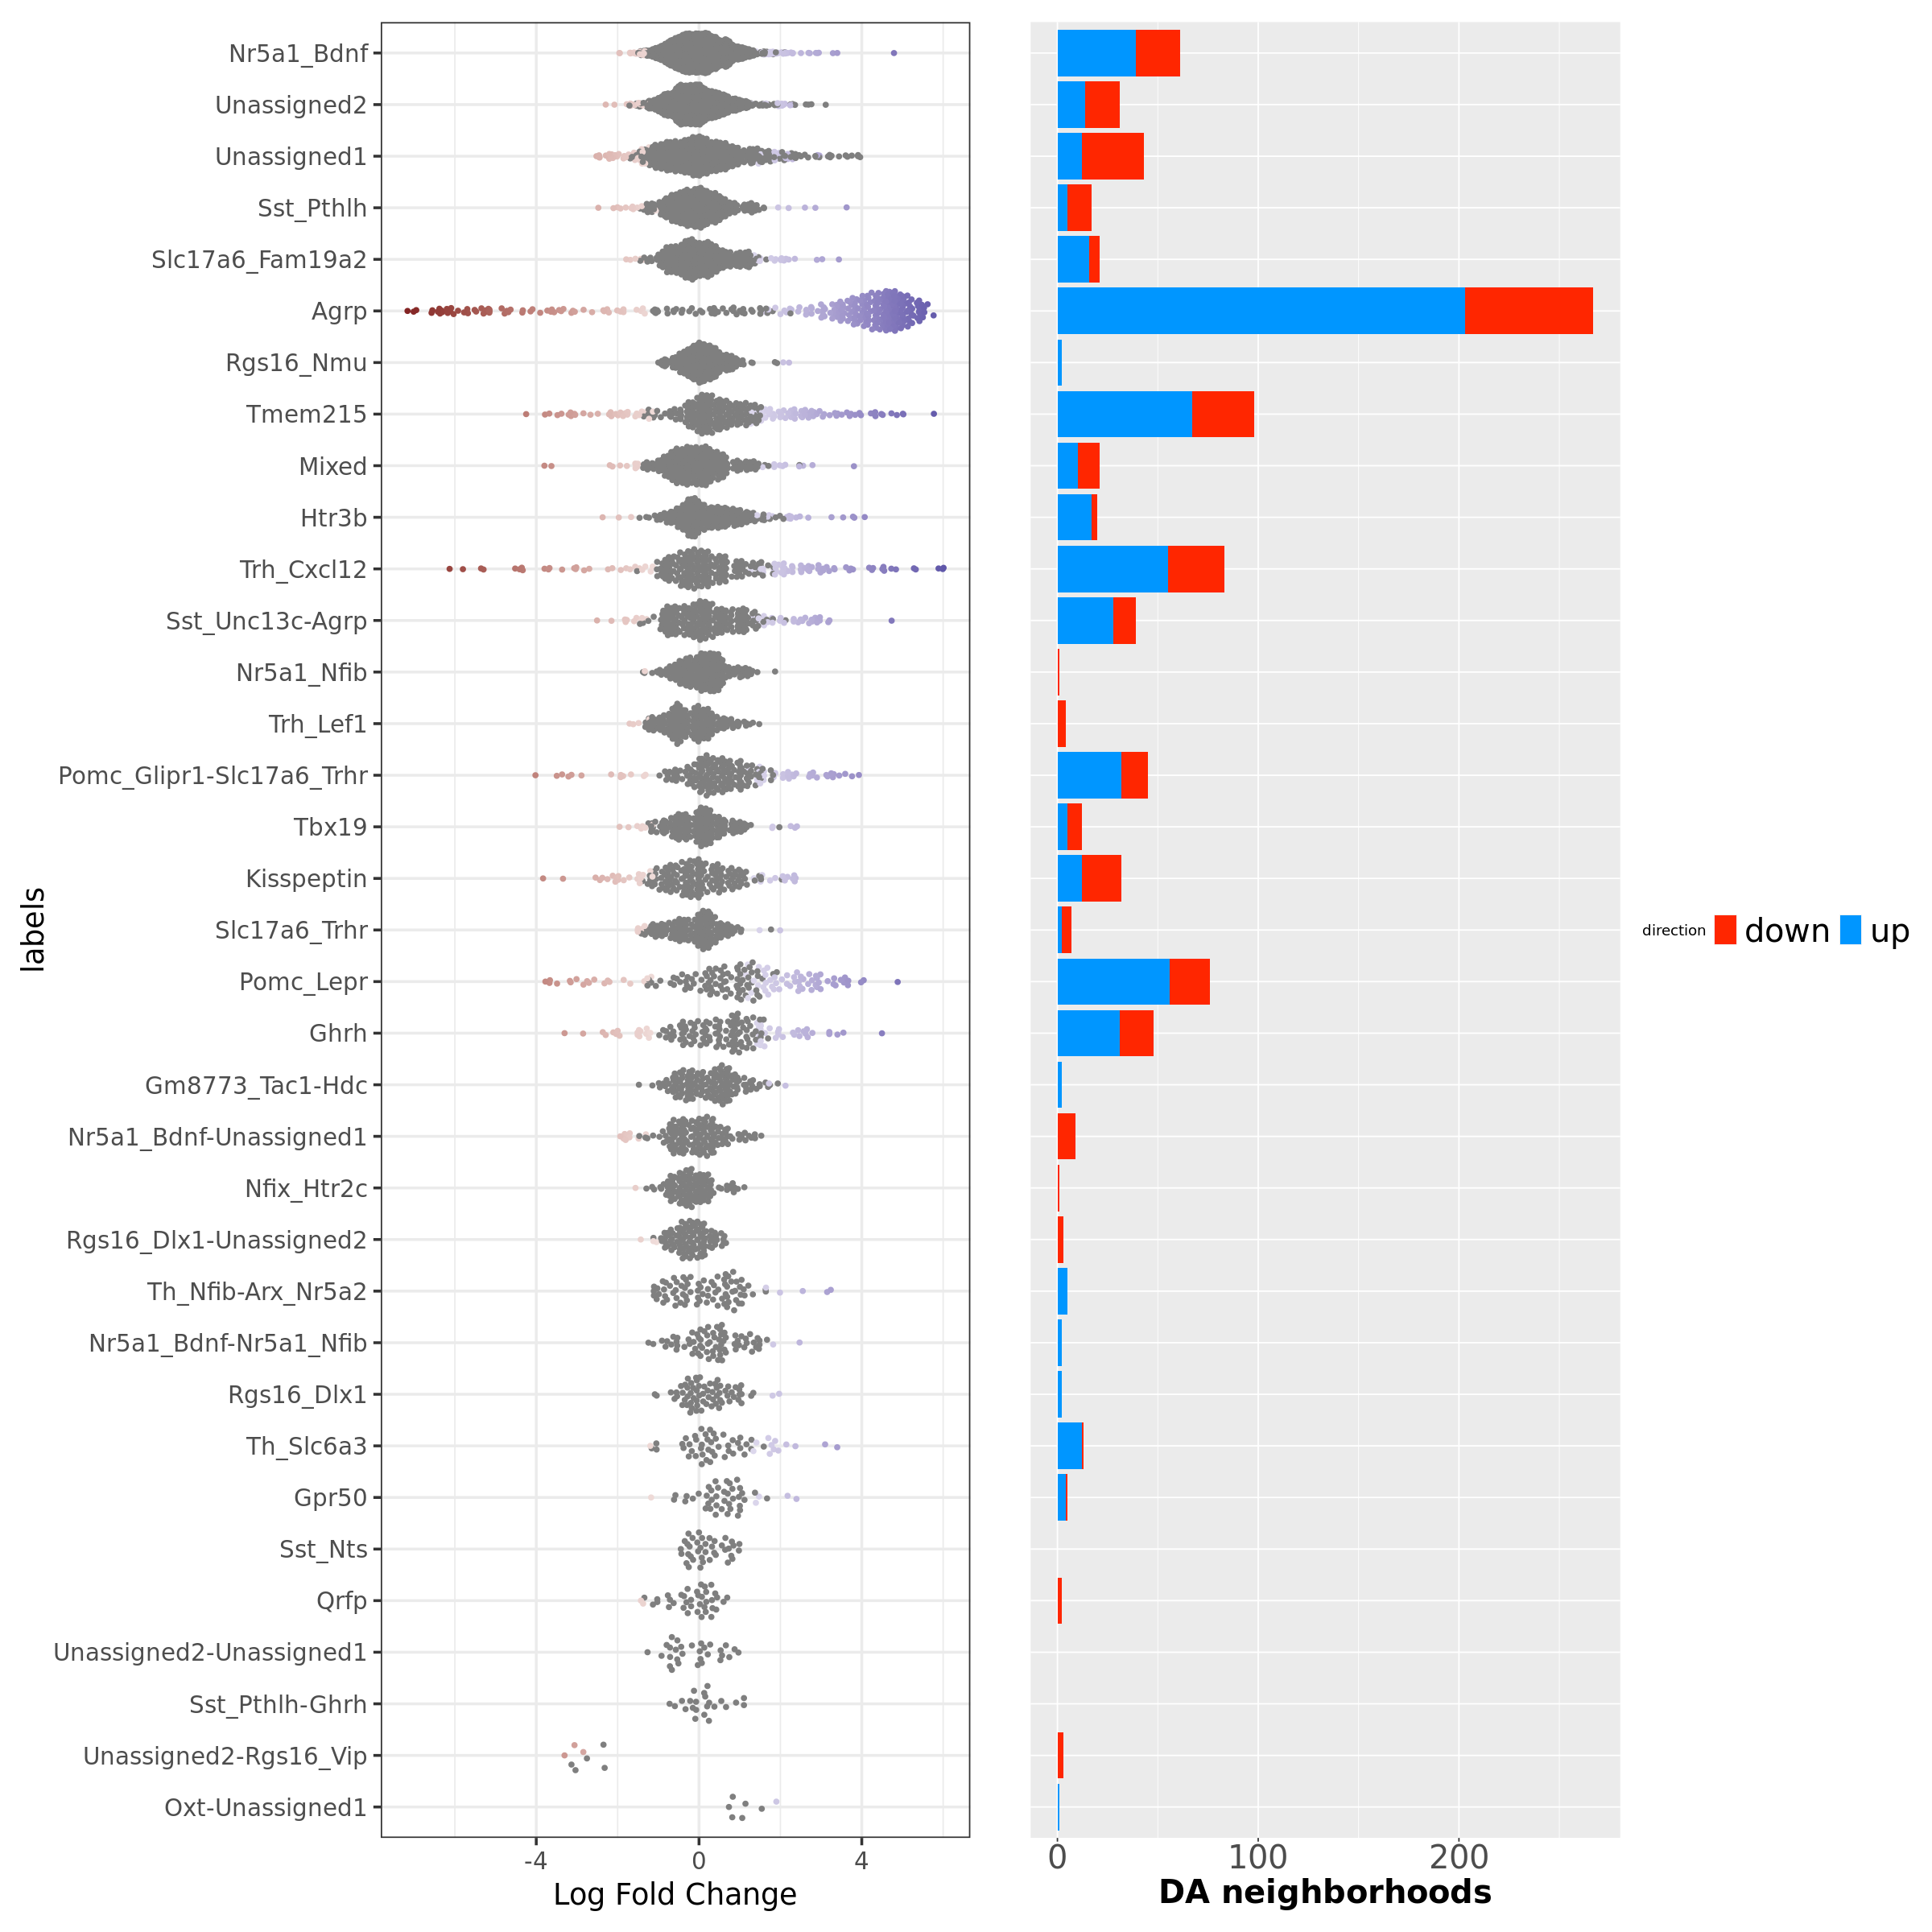

In [656]:
options(repr.plot.width=20, repr.plot.height=20)
pdab + dap +
  plot_layout(guides="collect") + theme(legend.position="bottom")

In [657]:
2

[1] 2